<h2><center> 🔰 🏰 Clash Of Clans Esport - The Perils and Commitment of Competitive Ranking 🗡️ 🎯 </center></h2>

<h4><center> From Raw Data To Analytic Insights: Data Cleaning, Exploration, and Data Science Revelation </center></h4>

<p><b>Dataset Author:</b> Asaniczka. (2024). <i>Clash of Clans Clans Dataset 2023 (3.5M Clans)</i>. Kaggle. 
<a href="https://www.kaggle.com/datasets/asaniczka/clash-of-clans-clans-dataset-2023-3-5m-clans?select=coc_clans_dataset.csv" target="_blank">[Link]</a></p>

<p><b>Official Source:</b> Clash Of Clans Statistics. <i>Supercell</i>. 
<a href="https://supercell.com/en/games/clashofclans/" target="_blank">[Link]</a></p>

<p><b>Predecessors</b>:
    <ul>
        <li> Berat, O. (2023). <i>Clash of Clans - Exploratory Data Analysis<i>. Kaggle. <a href="https://www.kaggle.com/code/beratozmen/clash-of-clans-exploratory-data-analysis" target="_blank">[Notebook]</a></li>
        <li> Thien, N. (2024). <i>Phân tích về clan trong clash of clans<i>. Kaggle. <a href="https://www.kaggle.com/code/nguyenthien3001/ph-n-t-ch-v-clan-trong-clash-of-clans" target="_blank">[Notebook]</a></li>
    </ul>
</p>

<p><b>EDA Revision & Extension:</b> Cresht</p>

### 📚 Libraries ⋆˙⟡ ###

In [1]:
#========================== Backbone of the exploratory analysis ==========================
import numpy as np
import pandas as pd
import seaborn as sns

#Hypothesis
from scipy.stats import spearmanr, mannwhitneyu, f_oneway

#Visualisation
import matplotlib.pyplot as plt
import matplotlib.figure
import matplotlib.cm as cm

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

#K-means clustering
from sklearn.cluster import KMeans

#Text Preprocessing
import string, re, nltk
from nltk.corpus import stopwords, wordnet
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import download, pos_tag
download(['punkt'])
from wordcloud import WordCloud

nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')

#========================== Miscellaneous ==========================
#Extension for OOP design
from abc import ABC, abstractmethod

#Extension for multiple savestates
import sys, os, math

#Mathematical operations
from math import ceil, pi

#Deprecation Warning Surpass
import warnings
warnings.filterwarnings('ignore')

#Aggregation
from functools import reduce

#Savestates graph
plot_all = {}

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### 🗃️ Data Pipeline 📦 ###

In [2]:
folder = "elune-project-eda"

# Add current folder for linking to the (file package) module
sys.path.append(os.path.abspath(os.path.dirname(folder)))  
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(folder), 'preprocessing')))

#Import necessary preprocessing features
from preprocessing.addons.label_encoding import LabelEncoding
from preprocessing.addons.onehot_encoding import OneHotEncoding
from preprocessing.addons.boxcox_transformer import BoxCoxTransformer
from preprocessing.addons.yeojohnson_transformer import YeoJohnsonTransformer
from preprocessing.addons.minmax_scaler import MinMax_Scaler
from preprocessing.addons.standard_scaler import Standard_Scaler
from preprocessing.addons.normalization_scaler import Normalization_Scaler
from preprocessing.addons.iqr_outlier import IQROutlierRemover
from preprocessing.addons.zscore_outlier import ZScoreOutlier
from preprocessing.addons.iqr_outlier_v2 import IQROutlierRemoverV2
from preprocessing.addons.zscore_outlier_v2 import ZScoreOutlierRemoverV2
from preprocessing.eda_pipeline import EDAPipeline, ColumnTransformerStep

### 📜 Introduction 🪶 ###

Clash Of Clans is the prominent mobile game released in 2012 with currently more than 95 million players and an average of 6.5 million daily active users (DAU). Through out seasonal peaks and subtle decline, the game remains long-lasting momentum during the rise of RPG-style figures (Andrea, K. 2025)<a href="https://www.blog.udonis.co/mobile-marketing/mobile-games/clash-of-clans-player-count" target="_blank">[1]</a>. This dataset was originally stripped from an eco-snapshot in 2023 by Asaniczka, revealed the static properties of around 3.5 million clans including conventional parameters, war metrics, etc.

In [35]:
#Dataset Overview : Clash Of Clans (2023)
df = pd.read_csv("coc_clans_dataset.csv")
df.head(5)

clan_tag        clan_name clan_type  \
0   #UQVQRJQ0      KOJIS' CLAN    closed   
1  #2QC9Y0CQU              uye      open   
2  #202CJRP2U  Uprising rivals      open   
3  #2Y89RRGLY     2inchersonly      open   
4   #99PU9QPY            aymil      open   

                                    clan_description  clan_location  \
0  STRATEGY IS MUST...RESPECT THE OTHERS...FORGIV...  International   
1                                                NaN      Indonesia   
2  💥official uprising rivals clan💥we bring 10% lu...      Indonesia   
3  Whom is not packing the meat, Shall be packing...  International   
4  regla1=no empezar la guerra sin mi permiso reg...  International   

   isFamilyFriendly                                     clan_badge_url  \
0              True  https://api-assets.clashofclans.com/badges/200...   
1              True  https://api-assets.clashofclans.com/badges/200...   
2              True  https://api-assets.clashofclans.com/badges/200...   
3              True  https://api-assets.clashofclans.com/badges/200...   
4              True  https://api-assets.clashofclans.com/badges/200...   

   clan_level  clan_points  clan_builder_base_points  ...  clan_war_league  \
0           6         6887                      5213  ...         Unranked   
1           1          876                      1019  ...         Unranked   
2           1          732                       670  ...         Unranked   
3           2         1156                       457  ...  Bronze League I   
4           2          674                       399  ...         Unranked   

   num_members required_builder_base_trophies  required_versus_trophies  \
0           11                           1000                      1000   
1            1                              0                         0   
2            2                              0                         0   
3            2                              0                         0   
4            2                              0                         0   

   required_townhall_level  clan_capital_hall_level  clan_capital_points  \
0                        1                        1                    0   
1                        1                        0                    0   
2                        1                        0                    0   
3                        1                        1                    0   
4                        1                        0                    0   

  capital_league  mean_member_level  mean_member_trophies  
0       Unranked                 83                  1254  
1       Unranked                 90                  1752  
2       Unranked                 30                   733  
3       Unranked                 61                  1156  
4       Unranked                 23                   674  

[5 rows x 27 columns]

### 🚧 Dataset Characteristics: Uniqueness & Challenges 🚫 ###

This dataset is about 929mb with over 3 million data identities. The rare gem that distinguishes between other raw data inputs is the unique clan tag which specifies the individual clan without fear of duplicated clans despite identical names, additionally the description also nails down the diversity of clan culture. Following categorical columns are general properties, war statistics, constraints on Town Hall, Builder Hall levels as well as trophies accumulation on both environments. <p>
Despite glamourous numeric columns, the prosperity often correlates with potential hurdles that demand strenuous efforts beyond surface-level investigation in accordance to most data analysis workload.
- Badge URL: Already compiled into URL structure, requiring special scraping techniques
- Description: Some of the fonts are displayed invalid or unrecognizable due to different language format.
- Clan tag, name and location (High-cardinality features with exacting dimensionality): Large proportion of classification that may overwhelm the users after preprocessing into numeric forms.
- Duplicated columns: Some scenarios where Builder Base Clan Points are similar to Clan Versus Points, as well trophies on both of categories.
- The indifference of majority Clash Of Clans players towards Capital Clan: As evidence by significant volume of zero points contribution and consecutive "Unranked" results in league.


### 🌱 Categorical Features: Key Values & Insights 🎋 ###

A remarkable hint is observed during overview: **_Trophies accumulation or level experience do not reflect the overall performance_**.
- The inspection of any arbitrary clan groups seemingly follows the funnel-shape structure based on war mechanics and personal exposure to this brand game ever since the childhood of author (Cresht).
- External Achievements: Mean Member Level & Trophies, Clan Members
- Numerical Metrics: War Frequency, Wins / Losses / Ties matches, Win Streak
- Power Screening: Clan Type, Family Friendly (Y/N), Required Trophies (TH & Builder Base), Required Town Hall Level.
- Regular Expression: Clan Description, Badge (URL)  

### 📝 Static information 📒 ###

In this section, the investigation is initialized to interpret general properties of Clash Of Clans snapshots, which ensure noisy values are not accounted for misintepretation during Exploratory Data Analysis section, presumably better compatibility in modeling tasks.<p>
Some of the parts are involved:
- Surface-level Inspection
- NaN / Null & Missing value detection
- Duplicated Value Detection
- Categorical Column Counters
- Shallow Visualisation

#### 1. Surface-level inspection ####

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3559743 entries, 0 to 3559742
Data columns (total 27 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   clan_tag                        object
 1   clan_name                       object
 2   clan_type                       object
 3   clan_description                object
 4   clan_location                   object
 5   isFamilyFriendly                bool  
 6   clan_badge_url                  object
 7   clan_level                      int64 
 8   clan_points                     int64 
 9   clan_builder_base_points        int64 
 10  clan_versus_points              int64 
 11  required_trophies               int64 
 12  war_frequency                   object
 13  war_win_streak                  int64 
 14  war_wins                        int64 
 15  war_ties                        int64 
 16  war_losses                      int64 
 17  clan_war_league                 object
 18  nu

In [5]:
df.describe()

clan_level   clan_points  clan_builder_base_points  \
count  3.559743e+06  3.559743e+06              3.559743e+06   
mean   2.349883e+00  2.576062e+03              2.562565e+03   
std    3.298436e+00  5.863921e+03              5.866313e+03   
min    1.000000e+00  0.000000e+00              0.000000e+00   
25%    1.000000e+00  3.520000e+02              1.000000e+02   
50%    1.000000e+00  6.930000e+02              6.470000e+02   
75%    2.000000e+00  1.801000e+03              1.867000e+03   
max    3.600000e+01  5.472100e+04              5.168600e+04   

       clan_versus_points  required_trophies  war_win_streak      war_wins  \
count        3.559743e+06       3.559743e+06    3.559743e+06  3.559743e+06   
mean         2.562565e+03       3.760651e+02    2.082535e-01  1.750428e+01   
std          5.866313e+03       8.334661e+02    1.016368e+00  6.050237e+01   
min          0.000000e+00       0.000000e+00    0.000000e+00  0.000000e+00   
25%          1.000000e+02       0.000000e+00    0.000000e+00  0.000000e+00   
50%          6.470000e+02       0.000000e+00    0.000000e+00  0.000000e+00   
75%          1.867000e+03       4.000000e+02    0.000000e+00  6.000000e+00   
max          5.168600e+04       6.553500e+04    2.610000e+02  1.565000e+03   

           war_ties    war_losses   num_members  \
count  3.559743e+06  3.559743e+06  3.559743e+06   
mean   2.143728e-01  9.981437e+00  4.758147e+00   
std    1.355269e+00  3.696328e+01  8.287075e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  1.000000e+00   
50%    0.000000e+00  0.000000e+00  2.000000e+00   
75%    0.000000e+00  4.000000e+00  4.000000e+00   
max    3.190000e+02  1.220000e+03  5.000000e+01   

       required_builder_base_trophies  required_versus_trophies  \
count                    3.559743e+06              3.559743e+06   
mean                     2.305894e+02              2.305894e+02   
std                      7.362564e+02              7.362564e+02   
min                      0.000000e+00              0.000000e+00   
25%                      0.000000e+00              0.000000e+00   
50%                      0.000000e+00              0.000000e+00   
75%                      0.000000e+00              0.000000e+00   
max                      5.500000e+03              5.500000e+03   

       required_townhall_level  clan_capital_hall_level  clan_capital_points  \
count             3.559743e+06             3.559743e+06         3.559743e+06   
mean              2.195218e+00             5.651079e-01         6.836864e+01   
std               2.733998e+00             1.607310e+00         3.652351e+02   
min               1.000000e+00             0.000000e+00         0.000000e+00   
25%               1.000000e+00             0.000000e+00         0.000000e+00   
50%               1.000000e+00             0.000000e+00         0.000000e+00   
75%               1.000000e+00             0.000000e+00         0.000000e+00   
max               1.500000e+01             1.000000e+01         5.866000e+03   

       mean_member_level  mean_member_trophies  
count       3.559743e+06          3.559743e+06  
mean        4.884267e+01          8.971466e+02  
std         3.868762e+01          5.874875e+02  
min         0.000000e+00          0.000000e+00  
25%         1.800000e+01          4.940000e+02  
50%         3.800000e+01          7.900000e+02  
75%         7.100000e+01          1.155000e+03  
max         3.150000e+02          5.466000e+03

**Implicaions**: Statistical measurements show significant tendency due to such proportion of data entities and potential biased unranked clans

#### 2. NaN / Null & Missing Value Detection ####

In [6]:
df.isnull().sum()

clan_tag                                0
clan_name                              62
clan_type                               0
clan_description                  1351365
clan_location                     1451672
isFamilyFriendly                        0
clan_badge_url                          0
clan_level                              0
clan_points                             0
clan_builder_base_points                0
clan_versus_points                      0
required_trophies                       0
war_frequency                           0
war_win_streak                          0
war_wins                                0
war_ties                                0
war_losses                              0
clan_war_league                         0
num_members                             0
required_builder_base_trophies          0
required_versus_trophies                0
required_townhall_level                 0
clan_capital_hall_level                 0
clan_capital_points               

**Implications**: Numeric metrics are already in good state, while retaining disordered text description columns (with around 1.3 mllions invalid data points) and hidden clan locations (assuming the privacy).

#### 3. Duplicated Value Detection ####

In [7]:
#Clan entities
df.duplicated().sum()

0

**Implications**: Clan entities show no overlapped each other due to the uniqueness of Clan Tag. In terms of categorical columns, Builder Base and Versus features are often misunderstood as distinctive. In fact both of them contain similar values (Required BB - Versus Trophies & Clan Builder Base - Versus Levels)

#### 4. Categorical Column Counters ####

In [8]:
print(f"Total number of unique features: {df.columns.value_counts().sum()}")

print("=========== List of all categorical features ===========")
for idx, col in enumerate(df.columns, start = 1):
    print(f"{idx}. {col}")

Total number of unique features: 27
=========== List of all categorical features ===========
1. clan_tag
2. clan_name
3. clan_type
4. clan_description
5. clan_location
6. isFamilyFriendly
7. clan_badge_url
8. clan_level
9. clan_points
10. clan_builder_base_points
11. clan_versus_points
12. required_trophies
13. war_frequency
14. war_win_streak
15. war_wins
16. war_ties
17. war_losses
18. clan_war_league
19. num_members
20. required_builder_base_trophies
21. required_versus_trophies
22. required_townhall_level
23. clan_capital_hall_level
24. clan_capital_points
25. capital_league
26. mean_member_level
27. mean_member_trophies


In [9]:
df["clan_location"].unique()

array(['International', 'Indonesia', 'Pakistan', nan, 'Türkiye',
       'Bahamas', 'Chile', 'Brazil', 'Philippines', 'Italy', 'Canada',
       'Mexico', 'Malaysia', 'India', 'Afghanistan', 'United States',
       'Iran', 'Germany', 'Uruguay', 'American Samoa', 'Thailand',
       'Vietnam', 'Greenland', 'Latvia', 'South Africa', 'Albania',
       'Japan', 'Hungary', 'Bangladesh', 'Norway', 'France',
       'Myanmar (Burma)', 'Kuwait', 'Australia', 'Bosnia and Herzegovina',
       'Ecuador', 'Kazakhstan', 'North Korea', 'Saudi Arabia',
       'New Zealand', 'Jamaica', 'China', 'Hong Kong', 'Panama',
       'United Kingdom', 'Barbados', 'Netherlands', 'Belgium', 'Russia',
       'Fiji', 'Uzbekistan', 'Swaziland', 'Dominican Republic', 'Iraq',
       'Portugal', 'Egypt', 'Israel', 'Western Sahara', 'Ireland',
       'Côte d’Ivoire', 'Heard & McDonald Islands', 'Åland Islands',
       'Bolivia', 'Samoa', 'Honduras', 'French Polynesia', 'Azerbaijan',
       'Andorra', 'Algeria', 'Anguilla', 

In [10]:
print(f"Total presence of clan countries: {df["clan_location"].nunique()}")

Total presence of clan countries: 255


In [11]:
#War Frequency:
print(f"War Frequency Types Count: {df["war_frequency"].nunique()}")

print("=========== List of all categorical features ===========")
for idx, col in enumerate(df["war_frequency"].unique(), start = 1):
    print(f"{idx}. {col}")

War Frequency Types Count: 6
=========== List of all categorical features ===========
1. moreThanOncePerWeek
2. unknown
3. always
4. never
5. oncePerWeek
6. lessThanOncePerWeek


In [12]:
#Clan Types:
print(f"Clan Types Count: {df["clan_type"].nunique()}")

print("=========== List of all categorical features ===========")
for idx, col in enumerate(df["clan_type"].unique(), start = 1):
    print(f"{idx}. {col}")

Clan Types Count: 3
=========== List of all categorical features ===========
1. closed
2. open
3. inviteOnly


#### 5. Shallow Visualisation ####

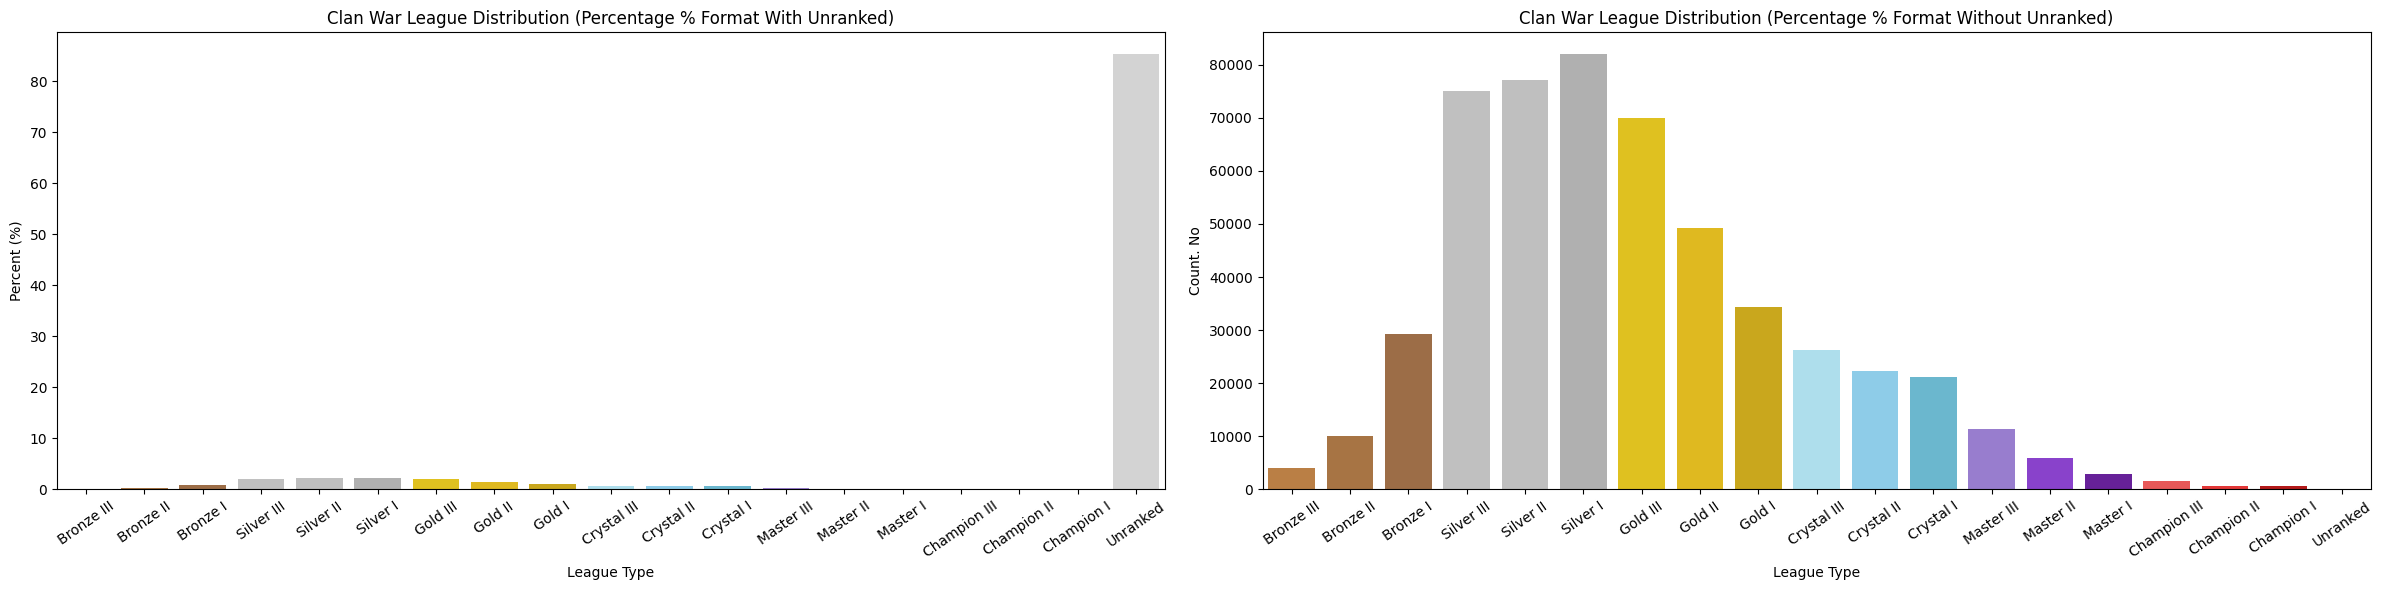

In [36]:
#Clan War League Distribution (With & Without Unranked League)

#Clan War League Occurrences
league_counts = df["clan_war_league"].value_counts().reset_index()
league_counts

#HEX colormap for equivalent leagues
league_colors = {
    "Bronze League III": "#cd7f32",
    "Bronze League II": "#b87333",
    "Bronze League I": "#aa6c39",
    "Silver League III": "#c0c0c0",
    "Silver League II": "#bfbfbf",
    "Silver League I": "#b0b0b0",
    "Gold League III": "#ffd700",
    "Gold League II": "#ffcc00",
    "Gold League I": "#e6b800",
    "Crystal League III": "#a3e4f7",
    "Crystal League II": "#7fd1f7",
    "Crystal League I": "#5bc0de",
    "Master League III": "#9370db",
    "Master League II": "#8a2be2",
    "Master League I": "#6a0dad",
    "Champion League III": "#ff4040",
    "Champion League II": "#ff1a1a",
    "Champion League I": "#cc0000",
    "Unranked": "#d3d3d3"
}

#Abbrevation
league_abbrv = {
    "Bronze League III": "Bronze III",
    "Bronze League II": "Bronze II",
    "Bronze League I": "Bronze I",
    "Silver League III": "Silver III",
    "Silver League II": "Silver II",
    "Silver League I": "Silver I",
    "Gold League III": "Gold III",
    "Gold League II": "Gold II",
    "Gold League I": "Gold I",
    "Crystal League III": "Crystal III",
    "Crystal League II": "Crystal II",
    "Crystal League I": "Crystal I",
    "Master League III": "Master III",
    "Master League II": "Master II",
    "Master League I": "Master I",
    "Champion League III": "Champion III",
    "Champion League II": "Champion II",
    "Champion League I": "Champion I",
    "Unranked": "Unranked"
}

#Ordinal leagues
league_customs = list(league_colors.keys())

#Safety check for league orders
league_counts = league_counts[league_counts["clan_war_league"].isin(league_customs)]
league_counts["clan_war_league"] = pd.Categorical(league_counts["clan_war_league"], categories = league_customs, ordered = True) #Labeled by order list

#Add color map and abbrevations to the league dataframe
league_counts["color"] = league_counts["clan_war_league"].map(league_colors)
league_counts["abbrv_league"] = league_counts["clan_war_league"].map(league_abbrv)

#Creating palette using abbrevations
abbrv_palette = dict(zip(league_counts["abbrv_league"], league_counts["color"]))

#Safe copies of with and without unranked league
full_league = league_counts.copy()
full_league["percent"] = (league_counts["count"] * 100) / league_counts["count"].sum()
valid_league = league_counts[league_counts["clan_war_league"] != "Unranked"].copy()
valid_league["clan_war_league"] = valid_league["clan_war_league"].cat.remove_categories(["Unranked"])

#Visualisation with barplot
fig, axes = plt.subplots(1, 2, figsize = (24, 6))

#Plot 1: With Unranked
sns.barplot(x = "abbrv_league", y = "percent", data = full_league, palette = abbrv_palette, ax = axes[0])
axes[0].set_title("Clan War League Distribution (Percentage % Format With Unranked)")
axes[0].set_xlabel("League Type")
axes[0].set_ylabel("Percent (%)")
axes[0].tick_params(axis = "x", rotation = 35)

#Plot 2: Without Unranked
sns.barplot(x = "abbrv_league", y = "count", data = valid_league, palette = abbrv_palette, ax = axes[1])
axes[1].set_title("Clan War League Distribution (Percentage % Format Without Unranked)")
axes[1].set_xlabel("League Type")
axes[1].set_ylabel("Count. No")
axes[1].tick_params(axis = "x", rotation = 35)

#For consistent layout
plt.tight_layout()
plot_all[f"shallow_cwl"] = fig
plt.show()

**Implications**: The nuance of unranked clan dominance has already been discussed, thus exclusion is made to only retain valid clans. Clash Of Clans is a game that prioritize strategic designs towards defense building and empowered troops - heroes. Most amateur clans in 2023 resided in silver and gold league, intriguingly Bronze is nearly least common type of league with more than 50000 slots. As leveling up to higher tiers, the competition is appropriate for long-term players, i.e competitors who actively do 7-day wars. <p>
Modest-performing clans are assumed to be struggling at Gold league, proportionally the decline aligns with the professional requirements in order to obtain valuable clan points (Beginning from Crystal to relatively rare Champion clans). <p>
Hence, this observation will be used to segregate upcoming widespread discovery. 

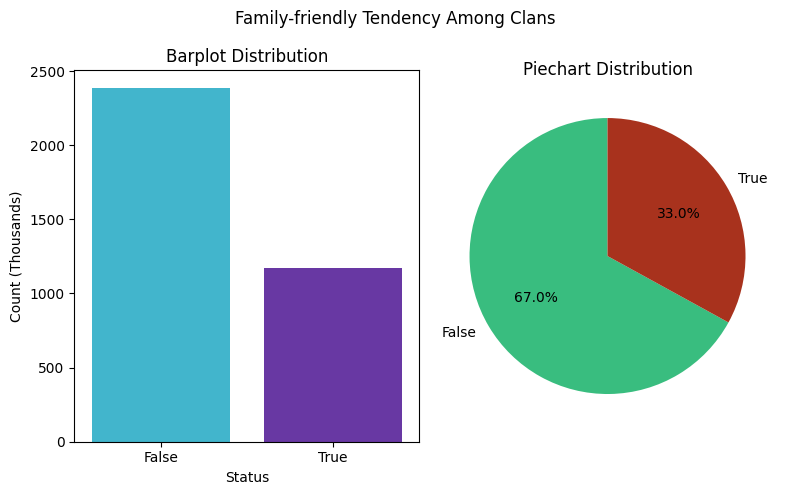

In [37]:
#Family Friendly
family_friendly = df["isFamilyFriendly"].value_counts().reset_index()
family_friendly["scaled_count"] = family_friendly["count"] / 1000
 
#Visualisation with barplot & piechart
fig, axes = plt.subplots(1, 2, figsize = (8, 5))

sns.barplot(x = "isFamilyFriendly", y = "scaled_count", data = family_friendly, ax = axes[0], palette = ["#2bc4e3", "#6626b5"])
axes[0].set_title("Barplot Distribution")
axes[0].set_xlabel("Status")
axes[0].set_ylabel("Count (Thousands)")

axes[1].pie(family_friendly["count"], labels = family_friendly["isFamilyFriendly"], autopct = "%1.1f%%", startangle = 90, colors = ["#39bd7f", "#a8321d"])
axes[1].set_title("Piechart Distribution")
fig.suptitle("Family-friendly Tendency Among Clans")

plt.tight_layout()
plot_all[f"shallow_ff"] = fig
plt.show()

**Implications**: Family Friendly Clans are those with less-frequent attention towards Daily Clan War & 7-day war streak. Other than competitive ranking, family friendly clans tend to be engineers - focusing on building upgrades and troop enhancement. In such scenarios, clans may display abrupt performance as evident by the standstill of Gold league or AFK phenomena due to the entertainment prejuidice.

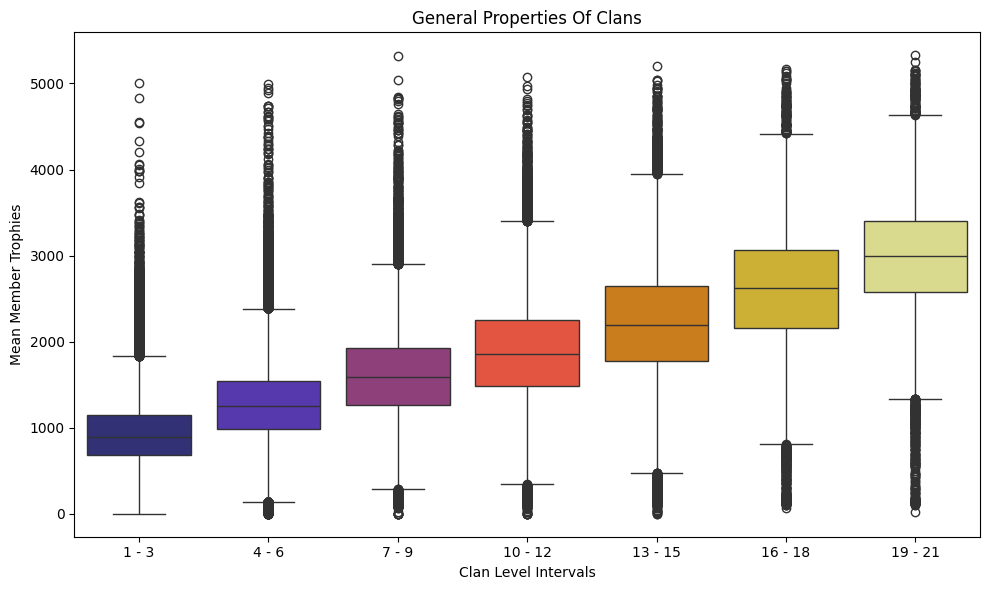

In [38]:
#pd.cut : Bin values into discrete intervals.
unranked_filtered = df[df["clan_war_league"] != "Unranked"].copy()

bins = [0, 3, 6, 9, 12, 15, 18, 21]
labels = ["1 - 3", "4 - 6", "7 - 9", "10 - 12", "13 - 15", "16 - 18", "19 - 21"]
unranked_filtered["clan_level_bin"] = pd.cut(unranked_filtered["clan_level"], bins = bins, labels = labels, right = True)

#Boxplot visualisation
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.boxplot(x = "clan_level_bin", y = "mean_member_trophies", data = unranked_filtered, palette="CMRmap")
ax.set_title("General Properties Of Clans")
ax.set_xlabel("Clan Level Intervals")
ax.set_ylabel("Mean Member Trophies")

plt.tight_layout()
plot_all[f"shallow_general"] = fig
plt.show()

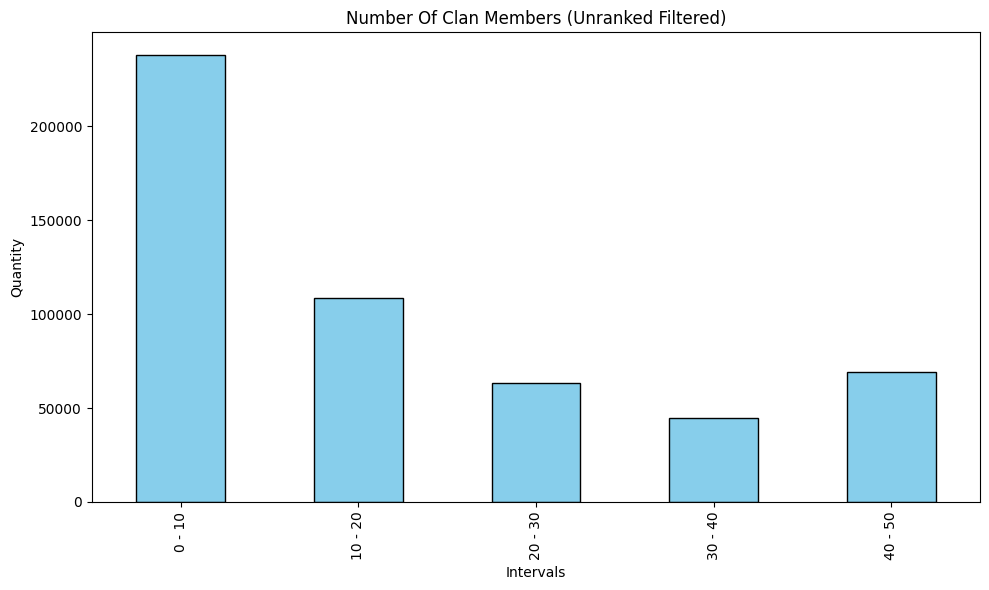

In [39]:
#Member Clans
member_clans = unranked_filtered["num_members"].copy()

bins = [0, 10, 20, 30, 40, 50]
labels = ["0 - 10", "10 - 20", "20 - 30", "30 - 40", "40 - 50"]
member_clans_binned = pd.cut(member_clans, bins = bins, labels = labels, right = True)

#Barplot visualisation
fig, ax = plt.subplots(figsize = (10, 6))
ax = member_clans_binned.value_counts(sort = False).plot(kind = "bar", color = "skyblue", edgecolor = "black")
ax.set_title("Number Of Clan Members (Unranked Filtered)")
ax.set_xlabel("Intervals")
ax.set_ylabel("Quantity")

plt.tight_layout()
plot_all[f"shallow_members"] = fig
plt.show()

**Implications**: Modest and high-performing clans often maintain stable number of around 30 to 50 members, which is likely indicate the commitment of game dedication - progressing in higher clan war league and advanced matchmaking in Legend league. 

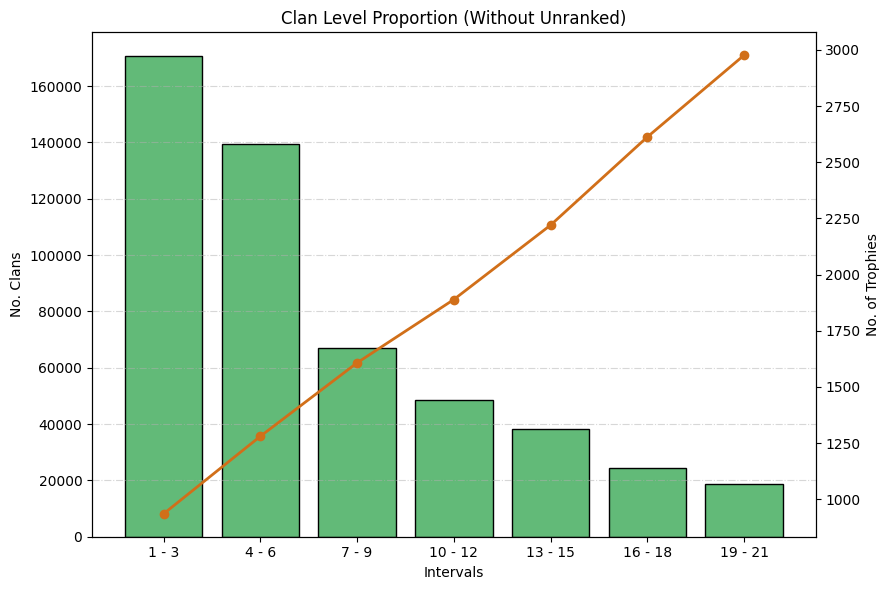

In [40]:
#Seperated Visualisations On Mean Member Trophies & Clan Levels. agg() : summarizing two values for each groups and peform operations (count, mean)
fig, ax = plt.subplots(1, 1, figsize = (9, 6))

level_dist = unranked_filtered.groupby("clan_level_bin").agg(clan_count = ("clan_level", "count"), mean_mem_trop = ("mean_member_trophies", "mean")).reset_index()

bar = sns.barplot(x = "clan_level_bin", y = "clan_count", data = level_dist, ax = ax, color="#53c970", edgecolor = "black")

bar.set_title("Clan Level Proportion (Without Unranked)")
bar.set_xlabel("Intervals")
bar.set_ylabel("No. Clans")
bar.grid(True, axis="y", linestyle="-.", alpha=0.5)


#Create second axis for mean member trophies
bar2 = bar.twinx()
bar2.plot(level_dist["clan_level_bin"], level_dist["mean_mem_trop"], color = "#d16f19", marker = "o", linewidth = 2, label = "Mean Member Trophies (Without Unranked)")
bar2.set_ylabel("No. of Trophies")

fig.tight_layout()
plot_all[f"shallow_clan_level"] = fig
fig.show()

**Implications**: Lower level clans are unstable with outs and ins between members, which results in changes in trophies accumulation (either positively or negatively). Higher ones (starting from level 13) show greater mean trophies at more than 2000 and approximately 3000 in level 19 - 21.

### 🧹 Feature Engineering & Data Cleaning 💨 ###

In [41]:
#Seperate into 4 main dataframes: War Metrics, External Achievements, Power Screening & Regular Expression. Additionally capital dataframes are served for several tasks involving.
base_cols = ["clan_name", "clan_tag", "clan_location"]

war_cols = base_cols + ["war_frequency", "war_win_streak", "war_wins", "war_ties", "war_losses", "clan_war_league"]
external_cols = base_cols + ["clan_level", "mean_member_level", "mean_member_trophies", "num_members", "clan_points", "clan_builder_base_points"]
power_cols = base_cols + ["clan_type", "isFamilyFriendly", "required_trophies", "required_townhall_level", "required_builder_base_trophies"]
reg_cols = base_cols + ["clan_description"]

#The cold turkey of capital league
capital_cols = base_cols + ["clan_capital_hall_level", "clan_capital_points", "capital_league"]

war_df = df[war_cols].copy()
external_df = df[external_cols].copy()
power_df = df[power_cols].copy()
reg_df = df[reg_cols].copy()
capital_df = df[capital_cols].copy()

#### Task 1: International Guild ####

In [42]:
# ====================== Section 1 ======================
external_inter = external_df[external_df["clan_location"] == "International"][base_cols + ["mean_member_trophies", "mean_member_level", "clan_level"]]

inter_df = df.loc[df["clan_location"] == "International"][[
    "clan_tag", "clan_name", "clan_type", "clan_level", 
    "num_members", "isFamilyFriendly", "war_frequency", "war_wins", "war_losses", "war_win_streak",
    "clan_war_league", "capital_league", "required_trophies", 
    "required_builder_base_trophies", "mean_member_level", "mean_member_trophies"]].copy() #Avoid modifications to the original df

#Constraints for constructing tables
HIGH_MIN, HIGH_MAX = 2600, 3000
MOD_MIN, MOD_MAX = 2100, 2600

MIN_MEM, MAX_MEM = 25, 30

N_HIGH = 25
N_MOD = 20

#Building representative tables 
table_cols = ["clan_tag", "clan_name", "clan_type", "clan_level", 
    "num_members", "isFamilyFriendly", "war_frequency", 
    "clan_war_league", "capital_league", "required_trophies", 
    "required_builder_base_trophies", "mean_member_level", "mean_member_trophies"]

#High-performing filter
high_mask = (inter_df["mean_member_trophies"] >= HIGH_MIN) & (inter_df["mean_member_trophies"] <= HIGH_MAX) & (inter_df["num_members"] >= MAX_MEM)
mod_mask = (inter_df["mean_member_trophies"] >= MOD_MIN) & (inter_df["mean_member_trophies"] <= MOD_MAX) & (inter_df["num_members"] >= MIN_MEM)

high_df = inter_df.loc[high_mask, table_cols].sort_values("mean_member_trophies", ascending = False).head(N_HIGH)
mod_df = inter_df.loc[mod_mask, table_cols].sort_values("mean_member_trophies", ascending = False).head(N_MOD)

combined_filtered = pd.concat([high_df, mod_df], ignore_index = True)

#Create heatmap (encoding and selecting features)
league_map = {
    "Unranked League": 0, "Bronze League III": 1, "Bronze League II": 2, "Bronze League I": 3,
    "Silver League III": 4, "Silver League II": 5, "Silver League I": 6, "Gold League III": 7,
    "Gold League II": 8, "Gold League I": 9, "Crystal League III": 10, "Crystal League II": 11,
    "Crystal League I": 12, "Master League III": 13, "Master League II": 14, "Master League I": 15,
    "Champion League III": 16, "Champion League II": 17, "Champion League I": 18
}

combined_filtered["cwl_score"] = combined_filtered["clan_war_league"].map(league_map)

corr_features = ["clan_level", "mean_member_trophies", "mean_member_level", "required_trophies", "cwl_score"]

#====================== Section 2 ======================
war_cols = ["clan_tag", "clan_name", "clan_war_league", "war_frequency", "war_wins", "war_losses", "war_win_streak", "isFamilyFriendly"]

################### ###################
#Family-friendly mask
friendly_high_mask = (inter_df["isFamilyFriendly"] == True) & (inter_df["mean_member_trophies"] >= HIGH_MIN) & (inter_df["mean_member_trophies"] <= HIGH_MAX) & (inter_df["num_members"] >= MAX_MEM)
non_friendly_high_mask = (inter_df["isFamilyFriendly"] == False) & (inter_df["mean_member_trophies"] >= HIGH_MIN) & (inter_df["mean_member_trophies"] <= HIGH_MAX) & (inter_df["num_members"] >= MAX_MEM)

#Balanced filter
fh_df = inter_df.loc[friendly_high_mask, war_cols].head(25).sample(frac = 1, random_state = 46)
nfh_df = inter_df.loc[non_friendly_high_mask, war_cols].head(25).sample(frac = 1, random_state = 46)
high_df_2 = pd.concat([fh_df, nfh_df]).reset_index(drop = True)

#Add win rates
high_df_2["war_win_rate"] = high_df_2["war_wins"] / (high_df_2["war_wins"] + high_df_2["war_losses"])
high_df_2["war_win_rate"] = high_df_2["war_win_rate"].fillna(0)
#Family Friendly encoded
high_df_2["family_friendly_encoded"] = high_df_2["isFamilyFriendly"].map({True : 1, False: 0})

################### ###################
#CWL & War Frequency encoding
high_df_2["clan_war_league_encoded"] = high_df_2["clan_war_league"].map(league_map)

wf_encoded = {
    "always": 4,
    "moreThanOncePerWeek" : 3,
    "oncePerWeek" : 2,
    "lessThanOncePerWeek" : 1,
    "unknown" : 0
}

high_df_2["war_frequency_encoded"] = high_df_2["war_frequency"].map(wf_encoded)

#War Engagement Score (WES)

#Normalize the categorical features
high_df_2["war_win_streak_norm"] = high_df_2["war_win_streak"] / high_df_2["war_win_streak"].max() #Getting possible highest streak
high_df_2["war_freq_norm"] = high_df_2["war_frequency_encoded"] / 4 #4 is the highest score in terms of war frequency encoded
high_df_2["war_win_rate_norm"] = high_df_2["war_win_rate"]

#Calculate WES (30 - 50 - 20)
high_df_2["war_engagement_score"] = 0.2 * high_df_2["war_win_streak_norm"] + 0.5 * high_df_2["war_win_rate"] + 0.3 * high_df_2["war_freq_norm"]

#Spearman Correlation
corr_df = high_df_2[["war_engagement_score", "war_win_rate", "war_frequency_encoded", "war_win_streak", "clan_war_league_encoded"]]
spearman_corr = corr_df.corr(method = "spearman")
################### ###################

#====================== Section 3 ======================
inter_cols = base_cols + ["num_members", "clan_type"] #base_cols: clan_name, clan_location, clan_tag
inter_df = df[(df["clan_war_league"] != "Unranked") & (df["clan_location"] == "International")][inter_cols].copy()

#Create member ticks
bins = [0, 10, 20, 30, 40, 50]
labels = ["0 - 10", "10 - 20", "20 - 30", "30 - 40", "40 - 50"]

inter_df["member_bins"] = pd.cut(inter_df["num_members"], bins = bins, labels = labels, include_lowest = True)

#### Task 2: Big-6 National Clash ####

In [43]:
#Country measurement
big_six_col = ["Germany", "Japan", "China", "Brazil", "United States", "Finland"]
big_six_df = df[(df["clan_location"].isin(big_six_col)) & (df["clan_war_league"] != "Unranked") & (df["mean_member_trophies"] >= 2100)].copy()

clan_counts = big_six_df["clan_location"].value_counts()
print(clan_counts)

clan_location
United States    9020
Germany          3682
Brazil           1884
Japan             629
China             298
Finland           184
Name: count, dtype: int64


In [44]:
# ====================== Section 1 ======================

#Stratified sampling (150 samples)
SAMPLE_SIZE = 150
sampled_df = big_six_df.groupby("clan_location", group_keys = False).apply(lambda x : x.sample(n = SAMPLE_SIZE, random_state = 46)).reset_index(drop = True)

#Trophy factor & Power score
max_th_req = sampled_df["required_trophies"].max()
max_bb_req = sampled_df["required_builder_base_trophies"].max()

sampled_df["trophy_factor"] = (sampled_df["required_trophies"] + sampled_df["required_builder_base_trophies"]) / (max_th_req + max_bb_req)

sampled_df["power_score"] = (sampled_df["clan_points"] + sampled_df["clan_builder_base_points"]) * (1 + sampled_df["trophy_factor"]) 

################### ###################
#Violin plot (BB / TH scores)
long_power_df = pd.melt(sampled_df, 
                        id_vars = ["clan_location"], 
                        value_vars = ["clan_points", "clan_builder_base_points"], 
                        var_name = "base_type" , value_name = "points")

#Readable form
long_power_df["base_type"] = long_power_df["base_type"].map({
    "clan_points" : "Town Hall (TH)",
    "clan_builder_base_points" : "Builder Base (BB)"
})

################### ###################
#Heatmap - Avg. trophies requirements 
heatmap_agg_df = sampled_df.groupby("clan_location")[["required_trophies", "required_builder_base_trophies", "power_score"]].mean().round(1)

#Rename for better display
heatmap_agg_df.columns = ["Mean Required TH Trop.", "Mean Required BB Trop.", "Power Score"]

# ====================== Section 2 ======================

################### ###################
capital_map = {
    "Unranked": 0,
    "Bronze League III": 1, "Bronze League II": 2, "Bronze League I": 3,
    "Silver League III": 4, "Silver League II": 5, "Silver League I": 6,
    "Gold League III": 7, "Gold League II": 8, "Gold League I": 9,
    "Crystal League III": 10, "Crystal League II": 11, "Crystal League I": 12,
    "Master League III": 13, "Master League II": 14, "Master League I": 15,
    "Champion League III": 16, "Champion League II": 17, "Champion League I": 18,
    "Titan League III": 19, "Titan League II": 20, "Titan League I": 21,
    "Legend League": 22
}

#Encode the captial & clan war league
big_six_df["capital_score"] = big_six_df["capital_league"].map(capital_map)
big_six_df["cwl_score"] = big_six_df["clan_war_league"].map(league_map)

#Cold Turkey - Hot Potato (KDE plot)
hot_cold_filtered = big_six_df.dropna(subset = ["capital_score", "cwl_score"])

#Dumbbell Plot - CWL VS. CW (By Country)
dumb_df = hot_cold_filtered.groupby("clan_location")[["cwl_score", "capital_score"]].mean()
dumb_df = dumb_df.sort_values("cwl_score")

################### ###################
#Archetype classification based CWL and CL standings
def classify_archetype(row):
    cwl = row["cwl_score"]
    capital = row["capital_score"]

    if capital >= 10 and cwl < 8:
        return "Sneaky Goblin"
    if cwl >= 11 and capital < 9:
        return "Barbarian"
    if capital >= 11 and cwl >= 11:
        return "P.E.K.K.A"
    else:
        return "Others"

big_six_df["Archetype"] = big_six_df.apply(classify_archetype, axis = 1)

# ====================== Section 3 ======================
profile_df = big_six_df.drop(columns = ["clan_tag", "clan_name", "clan_type", "clan_description"]).copy()

################### ###################
#War metrics
profile_df["war_played"] = profile_df["war_wins"] + profile_df["war_losses"] + profile_df["war_ties"]
profile_df["war_win_rate"] = ((profile_df["war_wins"] / profile_df["war_played"]) * 100).fillna(0)

#Extract mode values before aggregation
mode_values = profile_df.groupby("clan_location").agg({
    "war_frequency" : lambda x : x.mode().iloc[0] if not x.mode().empty else "Unknown",
    "clan_war_league" : lambda x : x.mode().iloc[0] if not x.mode().empty else "Unknown"
}).reset_index().rename(columns = {
    "war_frequency" : "freq_dist",
    "clan_war_league" : "cwl_dist"
})

################### ###################
#Second mode (Optional)
def second_classification(series):
    freq = series.value_counts()
    if len(freq) >= 2:
        return freq.index[1]
    elif len(freq) == 1:
        return freq.index[0]
    else:
        return None

second_modes = profile_df.groupby("clan_location")["clan_war_league"].agg(second_classification).reset_index()
second_modes.columns = ["clan_location", "second_cwl_dist"]

################### ###################
#Grouped dataframe
profile_df = profile_df.groupby("clan_location").agg({
    "mean_member_level" : "mean",
    "mean_member_trophies" : "mean",
    "war_wins" : "sum",
    "war_losses" : "sum",
    "war_ties" : "sum",
    "war_win_rate" : "mean",
    "isFamilyFriendly" : lambda x : round(((x == True).sum() / len(x)) * 100, 1)
}).reset_index()

profile_df[["mean_member_level", "mean_member_trophies"]] = profile_df[["mean_member_level", "mean_member_trophies"]].round(0)
profile_df["war_win_rate"] = profile_df["war_win_rate"].round(2)

#Merge mode values back to the profile_df
profile_df = profile_df.merge(mode_values, on = "clan_location", how = "left") #LEFT-JOIN
profile_df = profile_df.merge(second_modes, on = "clan_location", how = "left")

#### Task 3: Game Popularity vs. Fighting Force By Population #### 

In [45]:
################### ###################
high_pop_location = ["India", "Mexico", "Russia", "Türkiye"]
modest_pop_location = ["Norway", "New Zealand", "Croatia", "Kyrgyzstan"]
low_pop_location = ["Korea", "Spain", "Finland", "Uzbekistan"]

high_pop_df = df[(df["clan_location"].isin(high_pop_location)) & (df["clan_war_league"] != "Unranked")].drop(
    columns = ["clan_badge_url", "clan_versus_points", "required_versus_trophies"]).copy()
low_pop_df = df[(df["clan_location"].isin(low_pop_location)) & (df["clan_war_league"] != "Unranked")].drop(
    columns = ["clan_description", "clan_badge_url", "clan_versus_points", "required_versus_trophies"]).copy()
modest_pop_df = df[(df["clan_location"].isin(modest_pop_location)) & (df["clan_war_league"] != "Unranked")].drop(
    columns = ["clan_badge_url", "clan_versus_points", "required_versus_trophies"]).copy()
################### ###################

In [46]:
# ====================== Section 1 ======================
high_pop_df["cwl_score"] = high_pop_df["clan_war_league"].map(league_map)
high_pop_df["capital_score"] = high_pop_df["clan_war_league"].map(league_map)

low_pop_df["cwl_score"] = low_pop_df["capital_league"].map(league_map)
low_pop_df["capital_score"] = low_pop_df["capital_league"].map(capital_map)

modest_pop_df["cwl_score"] = modest_pop_df["capital_league"].map(league_map)
modest_pop_df["capital_score"] = modest_pop_df["capital_league"].map(capital_map)

high_pop_df["family_friendly_score"] = high_pop_df["isFamilyFriendly"].map({False : 0, True : 1})
modest_pop_df["family_friendly_score"] = modest_pop_df["isFamilyFriendly"].map({False : 0, True : 1})
low_pop_df["family_friendly_score"] = low_pop_df["isFamilyFriendly"].map({False : 0, True : 1})

high_pop_df["clan_type_score"] = high_pop_df["clan_type"].map({"closed" : 0, "open" : 1, "inviteOnly" : 2})
modest_pop_df["clan_type_score"] = modest_pop_df["clan_type"].map({"closed" : 0, "open" : 1, "inviteOnly" : 2})
low_pop_df["clan_type_score"] = low_pop_df["clan_type"].map({"closed" : 0, "open" : 1, "inviteOnly" : 2})

high_pop_df["pop_group"] = "High Population"
modest_pop_df["pop_group"] = "Modest Population"
low_pop_df["pop_group"] = "Low Population"

################### ###################
#Surface-level quantity
combined_df = pd.concat([high_pop_df, low_pop_df], ignore_index = True)

df_melted = pd.melt(combined_df[combined_df["pop_group"].notnull()],
                    id_vars = ["pop_group"],
                   value_vars = ["mean_member_level", "num_members"],
                   var_name = "variable",
                   value_name = "value")

################### ###################
#Statistical testing
def run_tests(feature):
    high = high_pop_df[feature]
    low = low_pop_df[feature]

    #Mann-Whitney U Test
    u_stat, p_val = mannwhitneyu(high, low, alternative = "two-sided")

    print(f"--- Feature Validation: {feature} ---")
    print(f"U statistic rate: {u_stat:.2f}")
    print(f"P-values: {p_val:.4f}")
    print("")

# ====================== Section 2 ======================
################### ###################
#War Grinder Resources (WGR)

high_pop_df["war_win_rate"] = (high_pop_df["war_wins"] * 100) / (high_pop_df["war_wins"] + high_pop_df["war_losses"] + high_pop_df["war_ties"])
radar_metrics = ["mean_member_level", "mean_member_trophies", "war_win_rate", "cwl_score", "capital_score", "required_townhall_level"]

#Radar metrics    
agg_wgr = high_pop_df.groupby("clan_location").agg({
    "mean_member_level" : "mean",
    "mean_member_trophies" : "mean",
    "war_win_rate" : "mean",
    "cwl_score" : "mean",
    "capital_score" : "mean",
    "required_townhall_level" : "mean"
}).reset_index()

################### ###################
#Normalization
normalizer = EDAPipeline([
    ColumnTransformerStep(MinMax_Scaler(), radar_metrics),
])

wgr_transformed = normalizer.fit_transform(agg_wgr[radar_metrics])

wgr_transformed_df = pd.DataFrame(wgr_transformed, columns = radar_metrics)

wgr_transformed_df.insert(0, "clan_location", agg_wgr["clan_location"])

# ====================== Section 3 ======================
#Fatal Underdog Massacre Or Deserted Cactus

#Extra: How well does the requirements affect to the clan experience levels?
mean_high = high_pop_df.groupby("clan_location")[["required_townhall_level", "required_trophies", "clan_level"]].mean().reset_index()
mean_modest = modest_pop_df.groupby("clan_location")[["required_townhall_level", "required_trophies", "clan_level"]].mean().reset_index()
combined_group = pd.concat([mean_high, mean_modest])

################### ###################
#CWL Distribution
high_cwl = high_pop_df.groupby(["clan_location", "clan_war_league"]).size().reset_index(name = "count")
modest_cwl = modest_pop_df.groupby(["clan_location", "clan_war_league"]).size().reset_index(name = "count")
high_cwl["pop_group"] = "High Population"
modest_cwl["pop_group"] = "Modest Population"

cwl_combined = pd.concat([high_cwl, modest_cwl])
cwl_combined["clan_war_league"] = cwl_combined["clan_war_league"].map(league_abbrv)

################### ###################
#Clan properties blueprint (High and modest performing)
blue_metrics = ["required_trophies", "required_builder_base_trophies", "required_townhall_level"]

high_pop_req = high_pop_df[(high_pop_df["mean_member_trophies"] >= 2600) & (high_pop_df["mean_member_trophies"] <= 3000)]
modest_pop_req = modest_pop_df[(modest_pop_df["mean_member_trophies"] >= 2100) & (modest_pop_df["mean_member_trophies"] <= 2600)]

combined_req = pd.concat([high_pop_req, modest_pop_req])
combined_req["clan_type"] = combined_req["clan_type"].map({"closed" : 0, "open" : 1, "inviteOnly" : 2})

agg_pop_req = combined_req.groupby(["pop_group", "clan_location"])[blue_metrics].mean().reset_index()

melted_pop_req = agg_pop_req.melt(id_vars = ["pop_group", "clan_location"], var_name = "Metric", value_name = "Avg. Counts")

################### ###################
#Clustered Heatmap (Structured, competitive clans)
clus_features = ["required_builder_base_trophies", "required_trophies", "required_townhall_level", "clan_points", "clan_builder_base_points"]

heatmap_df = combined_req.groupby("clan_location")[clus_features].mean()

#Normalize the features
normalizer = EDAPipeline([
    ColumnTransformerStep(Normalization_Scaler(), ["required_builder_base_trophies", "required_trophies", "clan_points", "clan_builder_base_points", "required_townhall_level"])
])

heatmap_encoded_df = normalizer.fit_transform(heatmap_df)

#Family Friendly & Clan Type Distribution
combined_ff = combined_req[["clan_location", "family_friendly_score"]].copy()
combined_ct = combined_req[["clan_location", "clan_type"]].copy()

################### ###################
#DPS (Disciplinary Prosperity Score)
combined_req["dps"] = (combined_req["required_trophies"] + combined_req["required_builder_base_trophies"] + combined_req["clan_points"]) / 3

dps_df = combined_req.groupby("clan_location")["dps"].mean().reset_index()

# Function to format actual DPS values in the chart
def format_dps(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{absolute}"

#### Task 4: ASEAN Standing - Old But Evergreen ####

In [47]:
asean_countries = ["Cambodia", "Indonesia", "Laos", "Singapore", "Myanmar", "Philippines", "Malaysia", "Vietnam", "Thailand", "Brunei", "Timor-Leste"]
asean_df = df[(df["mean_member_trophies"] >= 2100) & (df["mean_member_trophies"] <= 3000) & (df["clan_location"].isin(asean_countries))].copy()

asean_df["cwl_score"] = asean_df["clan_war_league"].map(league_map)
asean_df["capital_score"] = asean_df["capital_league"].map(capital_map)

In [48]:
# ====================== Section 1 ======================
################### ###################
#K-mean clustering (3 player types)
asean_features = ["cwl_score", "capital_score", "mean_member_level", "mean_member_trophies"]

x = asean_df[asean_features]

#Drop NaN values
x = x.dropna().reset_index(drop = True) #Drop old index

#Normalize the values
asean_scaler = EDAPipeline([
    ColumnTransformerStep(Normalization_Scaler(), asean_features)
])

x_normalized = asean_scaler.fit_transform(x)

# ====================== Section 2 ======================
################### ###################
#Timor-leste
repr_asean_clans = []
repr_asean_clans.append(asean_df[(asean_df["clan_location"] == "Timor-Leste") & (asean_df["mean_member_trophies"] >= 2100) & (asean_df["mean_member_trophies"] <= 3000)])

repr_asean_clans = pd.concat(repr_asean_clans, ignore_index = True)

################### ###################
#Remaining ASEAN countries
def asean_filter(asean_df, countries):
    asean_list = []
    for country in countries:
        asean_list.append(asean_df[(asean_df["clan_location"] == country) & (asean_df["mean_member_trophies"] >= 2600) & (asean_df["mean_member_trophies"] <= 3000)])
    return pd.concat(asean_list, ignore_index = True)

repr_asean_clans = asean_filter(asean_df, asean_countries)
repr_asean_clans = repr_asean_clans.sort_values(["clan_location", "mean_member_trophies"], ascending = [True, False]).groupby("clan_location", group_keys = False).head(50)

repr_asean_clans["cwl_score"] = repr_asean_clans["clan_war_league"].map(league_map)
repr_asean_clans["capital_score"] = repr_asean_clans["capital_league"].map(capital_map)
repr_asean_clans["wf_encoded"] = repr_asean_clans["war_frequency"].map(wf_encoded)

################### ###################
#Aggregation
repr_asean_features = ["war_rate", "loss_rate", "tie_rate", "wf_encoded", "cwl_score", "longest_win_streaks"]
repr_asean_nation = repr_asean_clans.groupby("clan_location").agg({
    "war_wins" : "sum",
    "war_losses" : "sum",
    "war_ties" : "sum",
    "cwl_score" : "max",
    "wf_encoded" : lambda x : x.mode().iloc[0] if not x.mode().empty else None, # return None if not exists mode
    "war_win_streak" : "max"
}).rename(columns = {
    "war_wins" : "total_wins", 
    "war_losses" : "total_losses",
    "war_ties" : "total_ties",
    "cwl_score" : "cwl_max_dist",
    "wf_encoded" : "wf_max_dist",
    "war_win_streak" : "longest_win_streaks"
})

repr_asean_nation["total_wars"] = repr_asean_nation["total_wins"] + repr_asean_nation["total_losses"] + repr_asean_nation["total_ties"]

################### ###################
#Normalize
asean_repr_scaler = EDAPipeline([
    ColumnTransformerStep(MinMax_Scaler(), ["total_wins", "total_losses", "total_ties", "cwl_max_dist", "wf_max_dist", "longest_win_streaks"]) 
])

repr_asean_normalized = asean_repr_scaler.fit_transform(repr_asean_nation).drop(columns = "total_wars")

#### Task 5: Behavioural System ####

In [49]:
# ====================== Section 1: Tie matches in Normal Clan War & Clan War League ======================
################### ###################
ties_filtered = df[(df["clan_war_league"] != "Unranked")].dropna(subset = ["war_ties", "clan_war_league"]).copy()

ties_grouped = ties_filtered.groupby("clan_war_league").agg({"war_ties" : "sum"})
ties_grouped = ties_grouped.rename(index = league_abbrv)

# ====================== Section 2: Netherite Gear VS. Diamond Gear With Mending  ======================
################### ###################
diamond_mending = df[(df["mean_member_trophies"] >= 2100) & (df["mean_member_trophies"] <= 2600) & (df["num_members"] >= 30) & (df["clan_war_league"] != "Unranked")].copy()
netherite = df[(df["mean_member_trophies"] >= 2600) & (df["num_members"] >= 25) & (df["clan_war_league"] != "Unranked")].copy()

for df in [diamond_mending, netherite]:
    df["war_performance"] = df["war_wins"] / (df["war_wins"] + df["war_losses"] + df["war_ties"])

# ====================== Section 3: Investigation of Abandoned Clans  ======================
################### ###################
ab_clan_country = ["Sri Lanka", "Pakistan", "Canada", "Argentina", "Italy"]
ab_no_italy_country = ["Sri Lanka", "Pakistan", "Canada", "Argentina"]

#Holder
ab_results = []
ab_scatter = []
ab_scatter_without_italy = []

#With Italy
for country in ab_clan_country:
    #Collect datapoints
    sample_set = df[(df["clan_location"] == country) & (df["clan_war_league"] != "Unranked")].copy()
    
    ab_scatter.append(sample_set)
        
    #Aggregate the statistics
    ab_results.append({
        "country" : country,
        "mean_member_level" : sample_set["mean_member_level"].mean(),
        "mean_member_trophies" : sample_set["mean_member_trophies"].mean(),
        "mean_member_quantity" : sample_set["num_members"].mean(),
        "mean_clan_points" : sample_set["clan_points"].mean()
    })

#Without Italy
for country in ab_no_italy_country:
    #Collect datapoints
    sample_set = df[(df["clan_location"] == country) & (df["clan_war_league"] != "Unranked")].copy()
    
    ab_scatter_without_italy.append(sample_set)

#Barplot
ab_df = pd.DataFrame(ab_results)

################### ###################
#Scatterplot
ab_scatter_df = pd.concat(ab_scatter).reset_index(drop = True)
ab_scatter_no_italy_df = pd.concat(ab_scatter_without_italy).reset_index(drop = True)

In [50]:
# ====================== Section 4: Cultural Clan Behaviour ======================
################### ###################
#Modest and High-performing clans (US - UK)
eng_df = df[(df["clan_location"].isin(["United Kingdom", "United States", "Australia"])) & (df["clan_war_league"] != "Unranked") & (df["mean_member_trophies"] >= 2100) & (df["mean_member_trophies"] <= 3000)][reg_cols].copy() 

eng_filtered_df = eng_df.dropna(subset=["clan_description"])

In [51]:
################### ###################
#Convert to lowercase
eng_filtered_df["cleaned_clan_description"] = eng_df["clan_description"].str.lower()

def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans("", "", punctuations))

eng_filtered_df["cleaned_clan_description"] = eng_filtered_df["cleaned_clan_description"].apply(lambda x : remove_punctuations(x))

In [52]:
################### ###################
#Remove emojies
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r" ", text)

eng_filtered_df["cleaned_clan_description"] = eng_filtered_df["cleaned_clan_description"].apply(lambda x : remove_emojis(x))

In [53]:
################### ###################
#Remove special characters
def remove_spl_chars(text):
    #Use raw string for RegEx
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text) #Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text).strip() #Remove redundant spaces, replaced by single space
    return text

eng_filtered_df["cleaned_clan_description"] = eng_filtered_df["cleaned_clan_description"].apply(lambda x : remove_spl_chars(x))

In [54]:
################### ###################
#Remove URL
def remove_url(text):
    return re.sub(r"https?://\S+|www\.\S+", "", text)

eng_filtered_df["cleaned_clan_description"] = eng_filtered_df["cleaned_clan_description"].apply(lambda x : remove_url(x))

In [55]:
################### ###################
#Removal of stopwords
STOPWORDS = set(stopwords.words("english"))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

eng_filtered_df["cleaned_clan_description"] = eng_filtered_df["cleaned_clan_description"].apply(lambda x : remove_stopwords(x))

In [56]:
################### ###################
#Lemmatization
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N" : wordnet.NOUN,
              "V" : wordnet.VERB,
              "J" : wordnet.ADJ,
              "R" : wordnet.ADV}

def lemmatize_words(text):
    pos_text = pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text]) #If any words that is not in the map, return the noun type as usual

eng_filtered_df["cleaned_clan_description"] = eng_filtered_df["cleaned_clan_description"].apply(lambda x : lemmatize_words(x))

In [57]:
################### ###################
#Tokenization
eng_filtered_df["cleaned_clan_description"] = eng_filtered_df["cleaned_clan_description"].apply(lambda x : word_tokenize(x))

In [58]:
eng_filtered_df.sample(frac = 1).head(10)

clan_name    clan_tag  clan_location  \
1896923         Heathens  #2LVJRGGCG  United States   
208543         Acapulcos  #2PPQPVULJ  United States   
53950    Hedgehog Ninjas   #PRQ9PCLQ  United States   
1457877      GOLDEN DAWN  #2Y9RUL02J  United States   
2059175              PTG  #22G0LUYVL  United States   
627212    Whittle Giants  #2PUJLL8LQ  United States   
3000991      the defiant   #Q899CVR9  United States   
1143374     S.H.E.I.L.D.   #29CQG2GY  United States   
2193545     the meh clan  #2L922PVRC  United States   
387242            lakomy    #PRJ22PG  United States   

                                          clan_description  \
1896923  ⚠️710 Friendly⚠️Back2Back War⚠️Clan Games⚠️Cla...   
208543   ◽️Welcome To Acapulcos ◽️ U.S Based Clan ◽️ Re...   
53950    Welcome to Ninja Bravo clan! We love to clash!...   
1457877  Old clan with new active members. Cwl and Clan...   
2059175  donate and fight in the wars, elder if active,...   
627212   HERE TO HAVE FUN!  DONT RUSH YOUR BASES!!! Par...   
3000991  participate in clan games,raid weekend,cwl.Be ...   
1143374  Welcome, We are an Active clan. Request, Donat...   
2193545  this clan is for active members only, so be pr...   
387242   Rebuilding Clan. need people to do clan games,...   

                                  cleaned_clan_description  
1896923  [710, friendly, back2back, war, clan, game, cl...  
208543   [welcome, acapulcos, u, base, clan, recruit, w...  
53950    [welcome, ninja, bravo, clan, love, clash, see...  
1457877  [old, clan, new, active, member, cwl, clan, ga...  
2059175  [donate, fight, war, elder, active, co, earn, ...  
627212   [fun, dont, rush, base, participate, war, game...  
3000991  [participate, clan, gamesraid, weekendcwlbe, a...  
1143374  [welcome, active, clan, request, donate, fight...  
2193545  [clan, active, member, prepare, fight, clan, w...  
387242   [rebuild, clan, need, people, clan, game, cwls...

### 📊 Exploratory Data Analysis (Discussion) 📉 ###

#### Task 1: International Guild ####

#### Section 1 ####

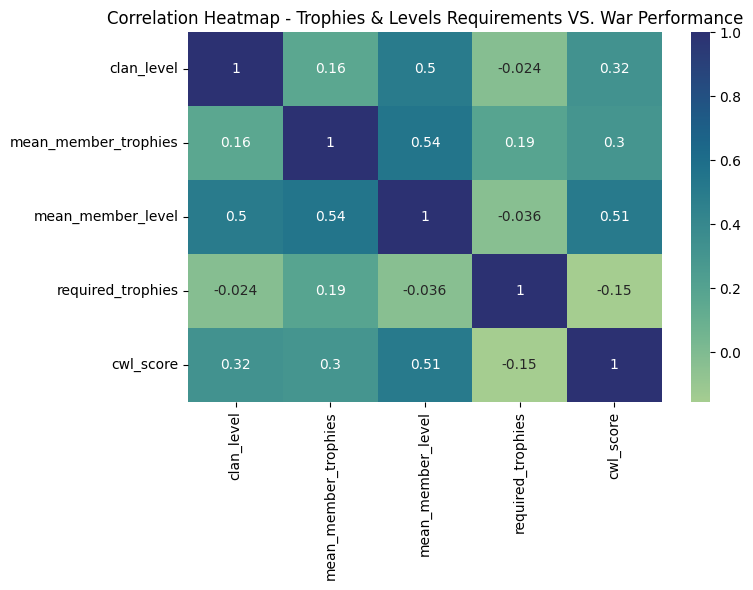

In [59]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.heatmap(combined_filtered[corr_features].corr(method = "spearman"), annot = True, cmap = "crest")

ax.set_title("Correlation Heatmap - Trophies & Levels Requirements VS. War Performance")

plt.tight_layout()
plot_all[f"t1_s1_corr"] = fig
plt.show()

**Hints**: Clan level <-> Mean Member Levels, Trophies & CWL <-> Required Trophies

#### Section 2 ####

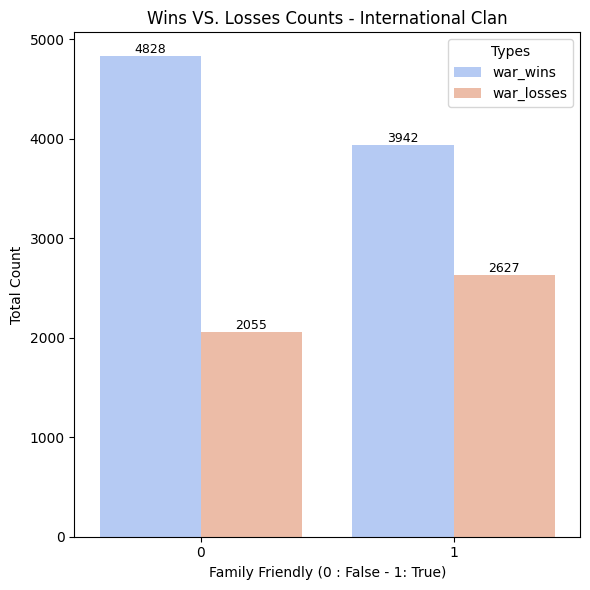

In [60]:
#Win vs. Loss counts (Stacked Bar Chart)

#pd.melt(df, id_vars=['A'], value_vars=['B'],
#        var_name='myVarname', value_name='myValname')
#   A myVarname  myValname
#0  a         B          1
#1  b         B          3
#2  c         B          5

agg_df = high_df_2.groupby("family_friendly_encoded")[["war_wins", "war_losses"]].sum().reset_index()
melted_df = agg_df.melt(id_vars = "family_friendly_encoded", var_name = "Result", value_name = "Count")

fig, ax = plt.subplots(figsize = (6, 6))

ax = sns.barplot(data = melted_df, x = "family_friendly_encoded", y = "Count", hue = "Result", palette = "coolwarm")

for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

ax.set_xlabel("Family Friendly (0 : False - 1: True)")
ax.set_ylabel("Total Count")
ax.set_title("Wins VS. Losses Counts - International Clan")
ax.legend(title = "Types")
plt.tight_layout()
plot_all[f"t1_s2_ff"] = fig
plt.show()

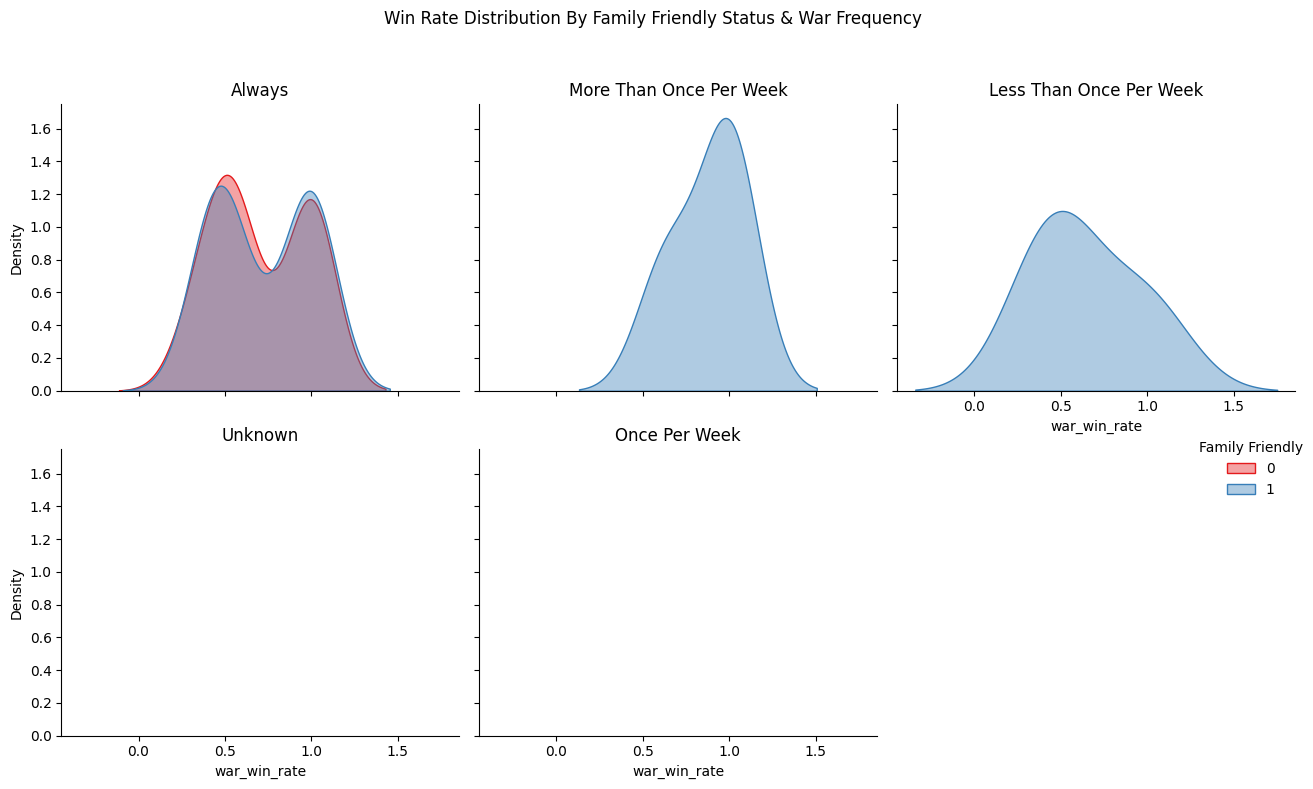

In [61]:
#Win Rate Distribution (KDE Plot)

war_freq_map = {
    "always" : "Always",
    "moreThanOncePerWeek" : "More Than Once Per Week",
    "lessThanOncePerWeek" : "Less Than Once Per Week",
    "unknown" : "Unknown",
    "oncePerWeek" : "Once Per Week"
}

graph = sns.FacetGrid(data = high_df_2, 
                      col = "war_frequency", 
                      hue = "family_friendly_encoded", 
                      height = 4, 
                      col_wrap = 3, 
                      palette = "Set1", 
                      sharex = True, sharey = True)

graph.map(sns.kdeplot, "war_win_rate", fill = True, alpha = 0.4)

graph.add_legend(title = "Family Friendly")
graph._legend.set_bbox_to_anchor((1, 0.4))
graph.fig.suptitle("Win Rate Distribution By Family Friendly Status & War Frequency")

#Rename the columns
graph.set_titles(col_template = "{col_name}")
for ax, title in zip(graph.axes.flatten(), graph.col_names):
    ax.set_title(war_freq_map.get(title, title))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plot_all[f"t1_s2_win_rate"] = graph.figure
plt.show()

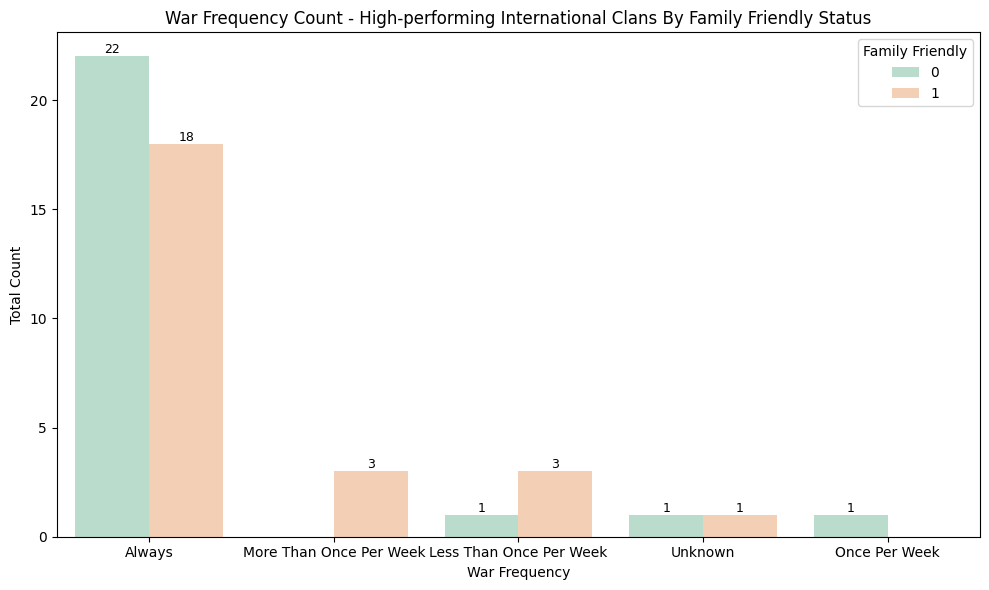

In [62]:
#War Frequency Counts (Clustered Bar Plot)

fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.countplot(data = high_df_2, x = "war_frequency", hue = "family_friendly_encoded", palette = "Pastel2")

ax.set_title("War Frequency Count - High-performing International Clans By Family Friendly Status")
ax.set_xlabel("War Frequency")
ax.set_ylabel("Total Count")

for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

#Rename the columns
labels = [war_freq_map.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)

ax.legend(title = "Family Friendly")
plt.tight_layout()
plot_all[f"t1_s2_wf_count"] = fig
plt.show()

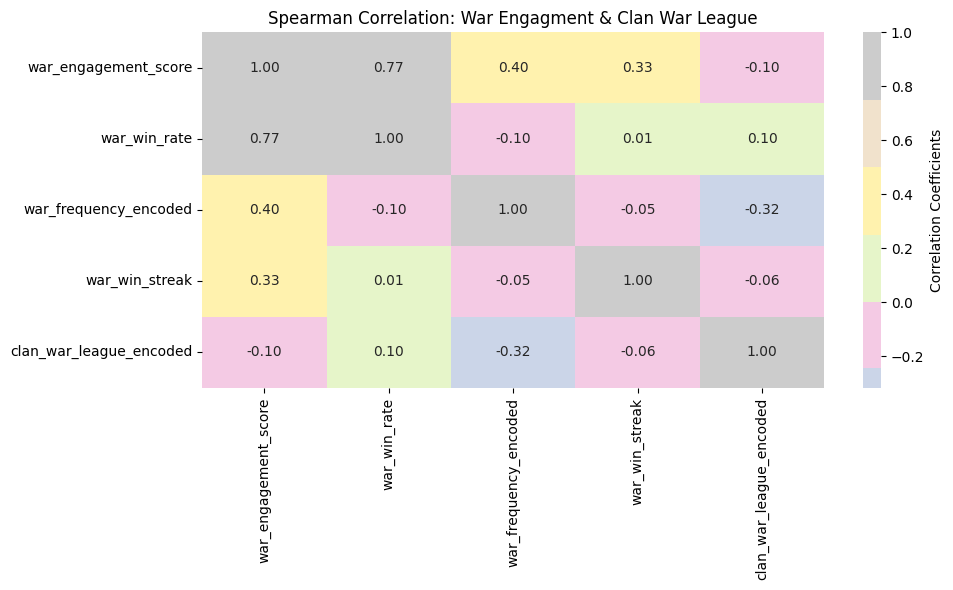

In [63]:
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.heatmap(spearman_corr, 
            annot = True, 
            fmt = ".2f" , 
            cmap = "Pastel2", 
            center = 0, 
            cbar_kws={'label': 'Correlation Coefficients'})
ax.set_title("Spearman Correlation: War Engagment & Clan War League")
plt.tight_layout()
plot_all[f"t1_s2_spearman"] = fig
plt.show()

**Hints**: Higher WES <-> Higher CWL. In fact, the correlation shows the opposition, WES only shows significant relationship with war win rate and war frequency of clans (moderately), whereas CWL is not implictly proportional to better performance in daily war.

In [64]:
#Hypothesis Inspection
rho, pval = spearmanr(high_df_2["war_engagement_score"], high_df_2["clan_war_league_encoded"])
print(f"Spearman Correlation (WES vs. CWL score): rho - {rho:.3f}, p-value : {pval:.4f}")

Spearman Correlation (WES vs. CWL score): rho - -0.101, p-value : 0.4871


#### Section 3 ####

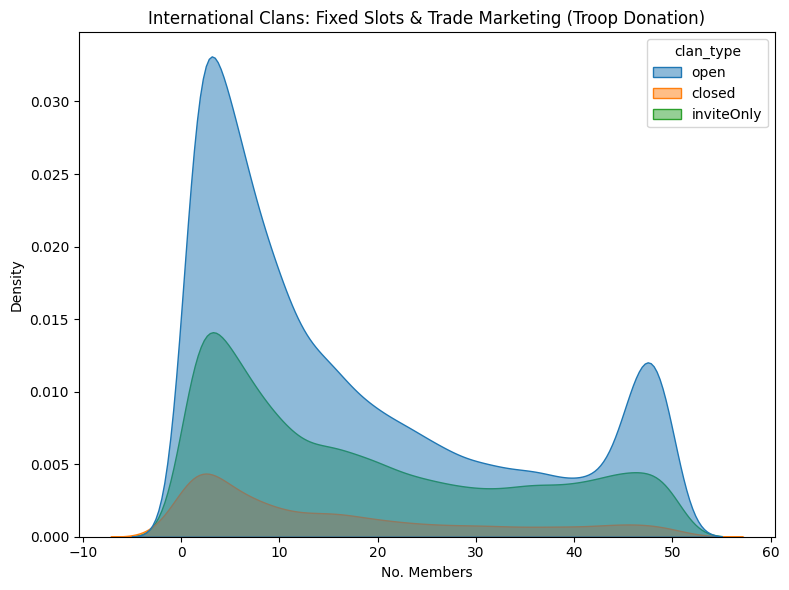

In [65]:
fig, ax = plt.subplots(figsize = (8, 6))

ax = sns.kdeplot(data = inter_df, x = "num_members", hue = "clan_type", fill = True, alpha = 0.5, common_norm = True)

ax.set_xlabel("No. Members")
ax.set_ylabel("Density")
ax.set_title("International Clans: Fixed Slots & Trade Marketing (Troop Donation)")
plt.tight_layout()
plot_all[f"t1_s3_members"] = fig
plt.show()

#### Task 2: Big-6 National Clash ####

#### Section 1: Early Bird - Night Owl ####

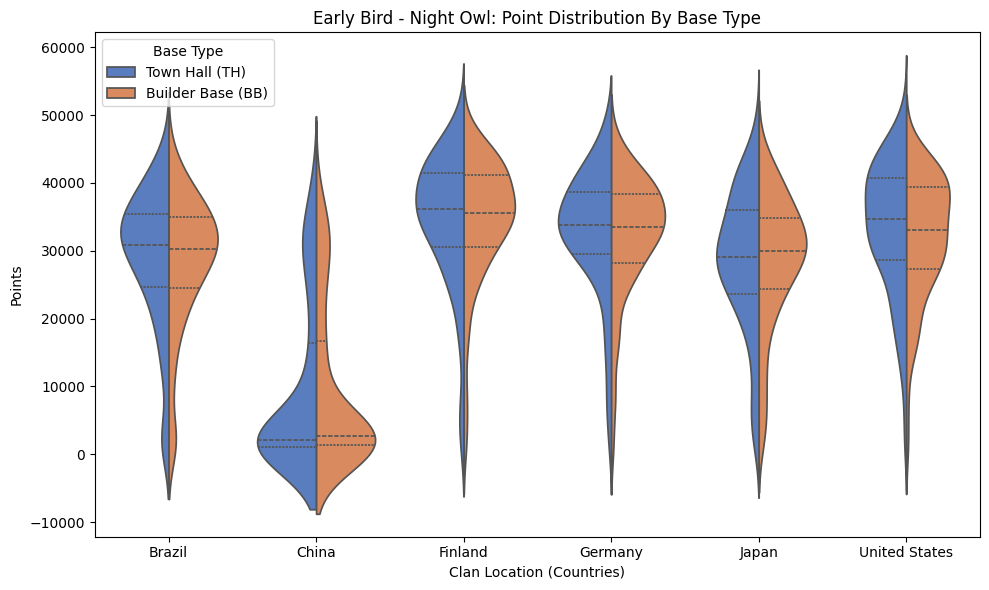

In [66]:
fig, ax = plt.subplots(figsize = (10, 6))

ax = sns.violinplot(x = "clan_location", y = "points", hue = "base_type", data = long_power_df, split = True, palette = "muted", inner = "quartile")

ax.set_title("Early Bird - Night Owl: Point Distribution By Base Type")
ax.set_xlabel("Clan Location (Countries)")
ax.set_ylabel("Points")
ax.legend(title = "Base Type")
plt.tight_layout()
plot_all[f"t2_s1_bird_owl"] = fig
plt.show()

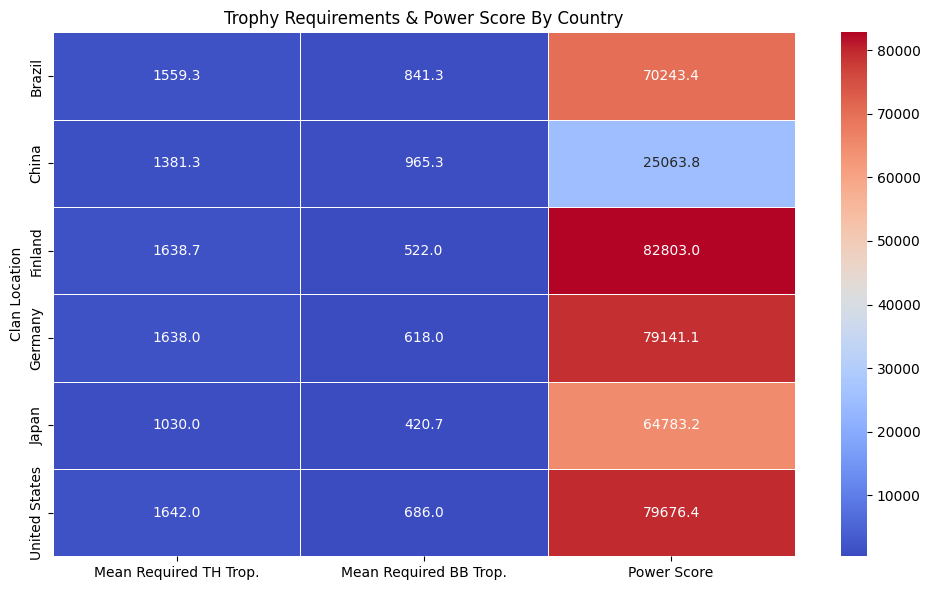

In [67]:
fig, ax = plt.subplots(figsize = (10, 6))

ax = sns.heatmap(heatmap_agg_df, annot = True, cmap = "coolwarm", fmt = ".1f", linewidths = 0.5)

ax.set_title("Trophy Requirements & Power Score By Country")
ax.set_ylabel("Clan Location")
plt.tight_layout()
plot_all[f"t2_s1_corr"] = fig
plt.show()

#### Section 2: Hot Potato - Cold Turkey ####

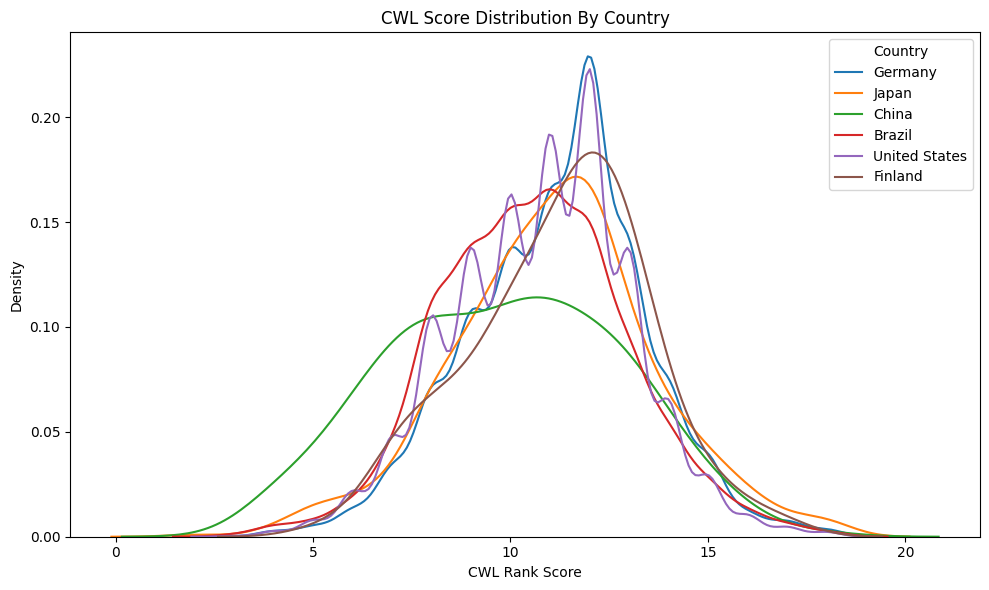

In [68]:
fig, ax = plt.subplots(figsize = (10, 6))

for country in big_six_col:
    ax = sns.kdeplot(data = hot_cold_filtered[hot_cold_filtered["clan_location"] == country], x = "cwl_score", label = country)

ax.set_xlabel("CWL Rank Score")
ax.set_ylabel("Density")
ax.set_title("CWL Score Distribution By Country")
ax.legend(title = "Country")
plt.tight_layout()
plot_all[f"t2_s2_cwl_score"] = fig
plt.show()

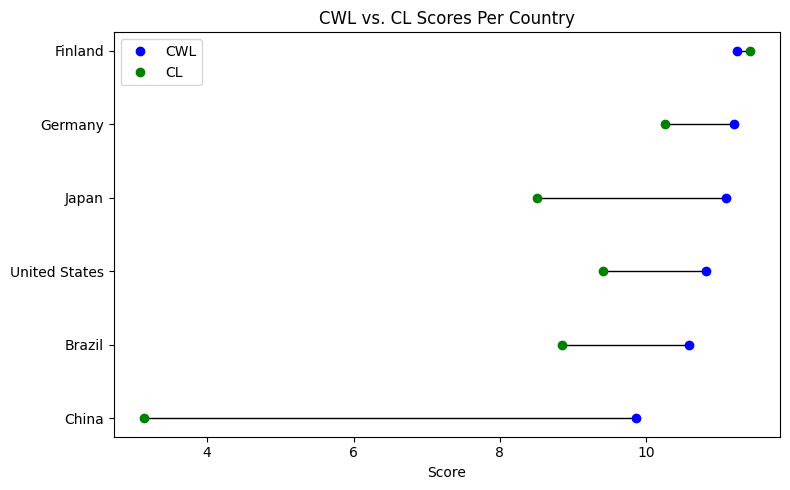

In [69]:
fig, ax = plt.subplots(figsize = (8, 5))

for i, (country, row) in enumerate(dumb_df.iterrows()):
    ax.plot([row["cwl_score"], row["capital_score"]], [i ,i], "k-", lw = 1)
    ax.plot(row["cwl_score"], i, "o", label = "CWL" if i == 0 else "", color = "blue")
    ax.plot(row["capital_score"], i, "o", label = "CL" if i == 1 else "", color = "green")

ax.set_yticks(range(len(dumb_df)))
ax.set_yticklabels(dumb_df.index)
ax.set_xlabel("Score")
ax.set_title("CWL vs. CL Scores Per Country")
ax.legend(loc = "upper left")
plt.tight_layout()
plot_all[f"t2_s2_cwl_cl_scores"] = fig
plt.show()

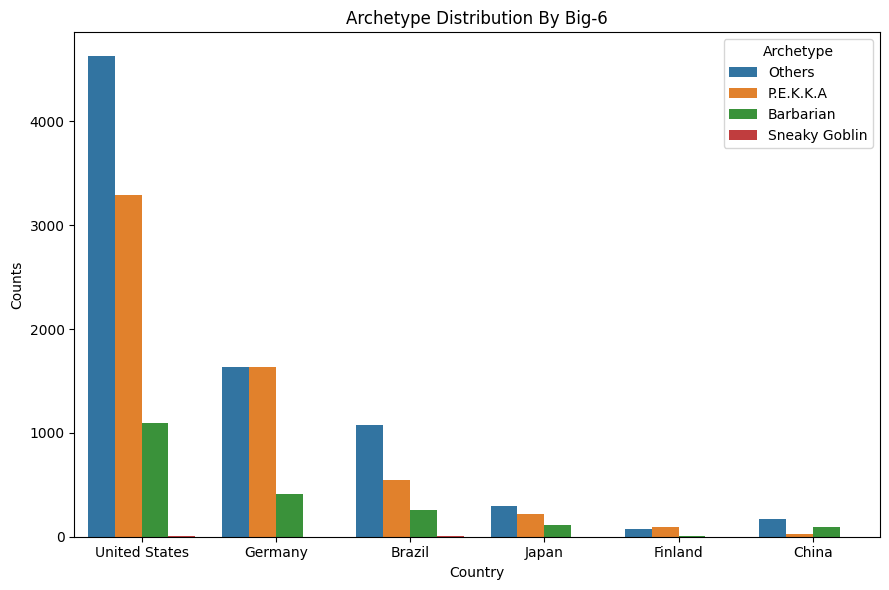

In [70]:
fig, ax = plt.subplots(figsize = (9, 6))
ax = sns.countplot(data = big_six_df, x = "clan_location", hue = "Archetype", palette = "tab10")

ax.set_title("Archetype Distribution By Big-6")
ax.set_xlabel("Country")
ax.set_ylabel("Counts")
plt.tight_layout()
plot_all[f"t2_s2_archetype"] = fig
plt.show()

#### Section 3: Profile Card Setup ####

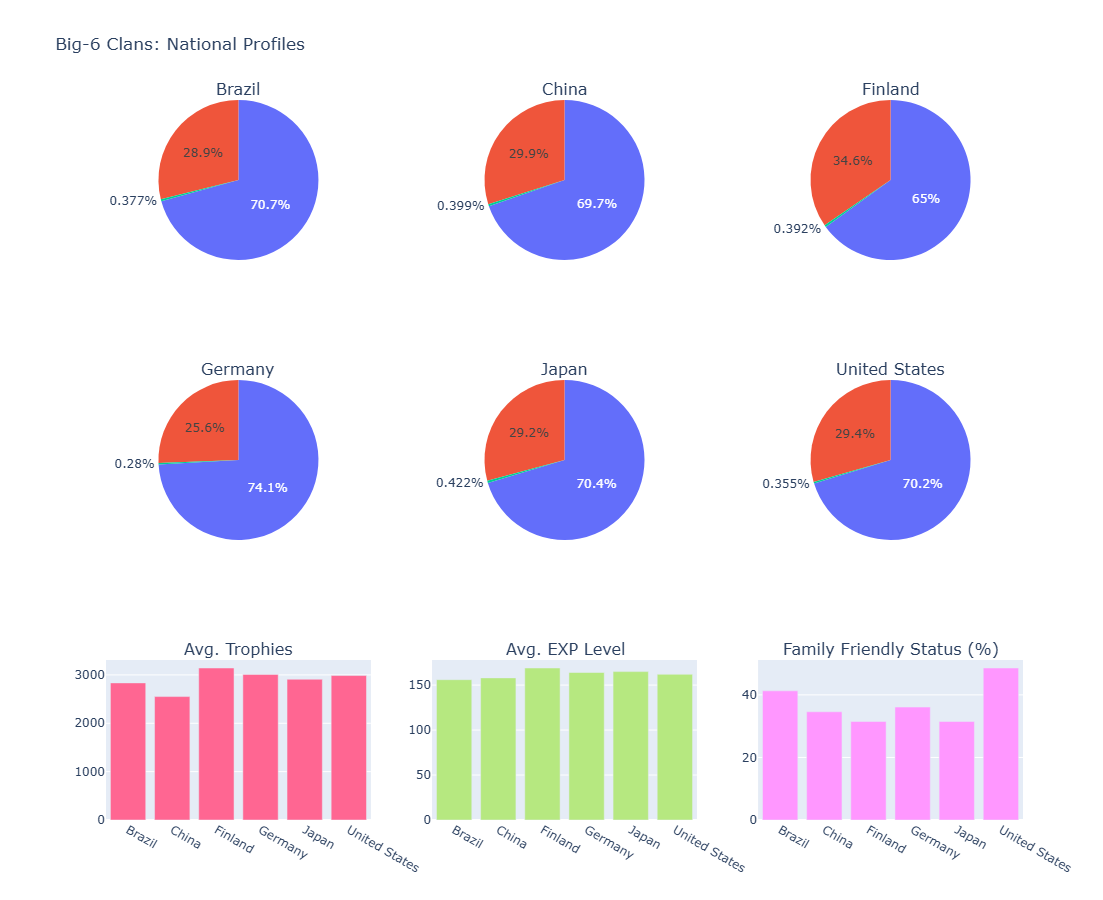

In [71]:
#Pie chart row estimation
n = len(profile_df)
cols = 3
pie_rows = ceil(n / cols)

#Specification Workaround 
specs = [[{"type" : "domain"} for _ in range(cols)] for _ in range(pie_rows)]
specs.append([{"type" : "xy"}] * 3) 

#Add titles for all subplots (plots + bar charts)
titles = profile_df["clan_location"].tolist() + ["Avg. Trophies", "Avg. EXP Level", "Family Friendly Status (%)"]

fig = make_subplots(
    rows = pie_rows + 1, cols = 3,
    subplot_titles = titles,
    specs = specs
)

#Pie chart : Row 1
for idx, row in profile_df.iterrows():
    pie_row = (idx // cols) + 1
    pie_col = (idx % cols) + 1
    labels = ["Wins", "Losses", "Ties"]
    values = [row["war_wins"], row["war_losses"], row["war_ties"]]
    fig.add_trace(go.Pie(labels = labels, values = values, name = row["clan_location"]), row = pie_row, col = pie_col) #Since index works by Python mechanism

#Bar chart per country
fig.add_trace(
    go.Bar(
        x = profile_df["clan_location"],
        y = profile_df["mean_member_trophies"],
        name = "Avg. Trophies"
    ), row = pie_row + 1, col = 1
)

fig.add_trace(
    go.Bar(
        x = profile_df["clan_location"],
        y = profile_df["mean_member_level"],
        name = "Avg. EXP Level"
    ), row = pie_row + 1, col = 2
)

fig.add_trace(
    go.Bar(
        x = profile_df["clan_location"],
        y = profile_df["isFamilyFriendly"],
        name = "Family Friendly Status (%)"
    ), row = pie_row + 1, col = 3
)

fig.update_layout(
    height = 300 * (pie_rows + 1), width = 1000, title_text = "Big-6 Clans: National Profiles",
    showlegend = False
)

fig.show()

#### Task 3: Game Popularity vs. Fighting Force By Population  ####

#### Section 1 ####

<Figure size 1000x600 with 0 Axes>

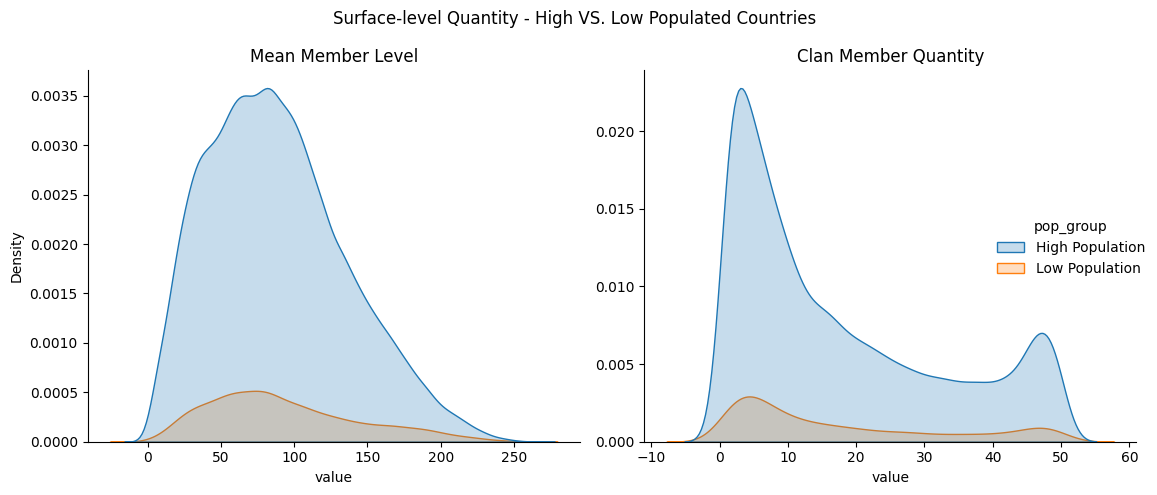

In [72]:
variable_map = {
    "mean_member_level" : "Mean Member Level",
    "num_members" : "Clan Member Quantity"
}

plt.figure(figsize = (10, 6))

g = sns.displot(data = df_melted, 
            x = "value", 
            col = "variable", 
            hue = "pop_group", 
            kind = "kde", 
            fill = True, facet_kws = {"sharex" : False, "sharey" : False})

#Rename the columns
for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(variable_map.get(title, title))

g.figure.suptitle("Surface-level Quantity - High VS. Low Populated Countries")
plt.tight_layout()
plot_all[f"t3_s1_game_force"] = g.figure
plt.show()

In [73]:
#Run Mann-Whitney U Test
for feature in ["mean_member_level", "num_members"]:
    run_tests(feature)

--- Feature Validation: mean_member_level ---
U statistic rate: 191171613.50
P-values: 0.0000

--- Feature Validation: num_members ---
U statistic rate: 198397051.00
P-values: 0.7669



#### Section 2 ####

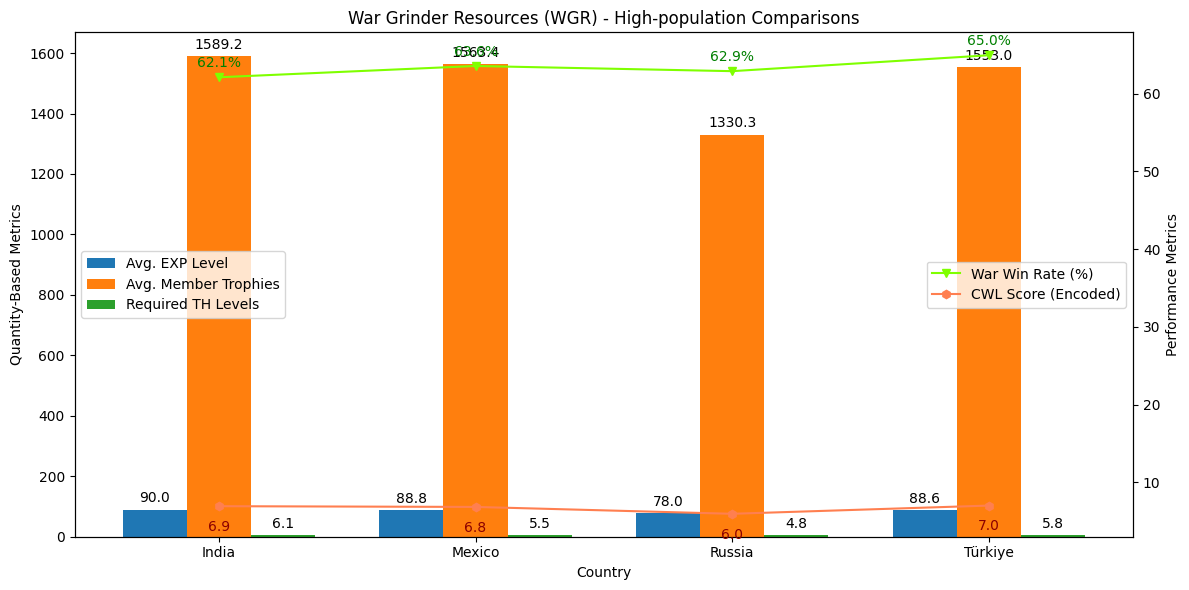

In [74]:
fig, ax1 = plt.subplots(figsize = (12, 6))

#Fixed components
bar_width = 0.25
countries = agg_wgr["clan_location"]
x = np.arange(len(countries))

#Bar Plot (Shared x-axis)
bar1 = ax1.bar(x - bar_width, agg_wgr["mean_member_level"], bar_width, label = "Avg. EXP Level")
bar2 = ax1.bar(x, agg_wgr["mean_member_trophies"], bar_width, label = "Avg. Member Trophies")
bar3 = ax1.bar(x + bar_width, agg_wgr["required_townhall_level"], bar_width, label = "Required TH Levels")

#Annotate Bars
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.1f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)

ax1.set_xticks(x)
ax1.set_xticklabels(countries)

ax1.set_xlabel("Country")
ax1.set_ylabel("Quantity-Based Metrics")
ax1.legend(loc = "center left")

#Line Plot (Shared x-axis)
ax2 = ax1.twinx()

ax2.plot(countries, agg_wgr["war_win_rate"], color = "chartreuse", marker = "v", label = "War Win Rate (%)")
ax2.plot(countries, agg_wgr["cwl_score"], color = "coral", marker = "h", label = "CWL Score (Encoded)")

#Annotate Line Plot
for i, (x_pos, y_val) in enumerate(zip(x, agg_wgr["war_win_rate"])):
    ax2.annotate(f'{y_val:.1f}%', xy=(x_pos, y_val),
                 xytext=(0, 5), textcoords='offset points',
                 ha='center', va='bottom', fontsize=10, color='green')

for i, (x_pos, y_val) in enumerate(zip(x, agg_wgr["cwl_score"])):
    ax2.annotate(f'{y_val:.1f}', xy=(x_pos, y_val),
                 xytext=(0, -10), textcoords='offset points',
                 ha='center', va='top', fontsize=10, color='darkred')

ax2.set_ylabel("Performance Metrics")
ax2.legend(loc = "center right")

plt.title("War Grinder Resources (WGR) - High-population Comparisons")
plt.xticks(rotation = 45)
plt.tight_layout()
plot_all[f"t3_s2_wgr"] = fig
plt.show()

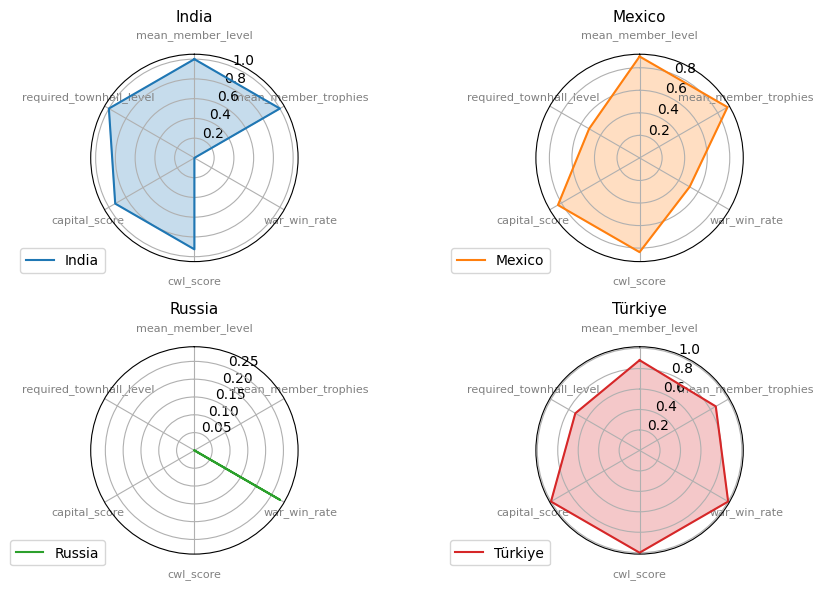

In [75]:
#Subplots
rows = 2
cols = 2

#Radar Chart

num_countries = len(high_pop_location[:rows * cols])
color = sns.color_palette("tab10", num_countries)

def make_radar_chart(ax, df, country_name, color):
    categories = radar_metrics
    
    values = df[df["clan_location"] == country_name][categories].values.flatten().tolist()
    values += values[:1] #Repeat the first value to close the circle

    #Calculate angle to fill in the color
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, color="grey", size=8)

    ax.plot(angles, values, linewidth=1.5, linestyle="solid", label=country_name, color = color)
    ax.fill(angles, values, alpha=0.25, color = color)
    ax.set_title(f"{country_name}", size=11)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))



fig, axs = plt.subplots(rows, cols, subplot_kw = dict(polar = True), figsize = (9, 6))

#Flatten for easy iteration
axs = axs.flatten()

for i, country in enumerate(high_pop_location[:rows * cols]):
    make_radar_chart(axs[i], wgr_transformed_df, country, color[i])

plt.tight_layout()
plot_all[f"t3_s2_big_4_pop"] = fig
plt.show()

#### Section 3 ####

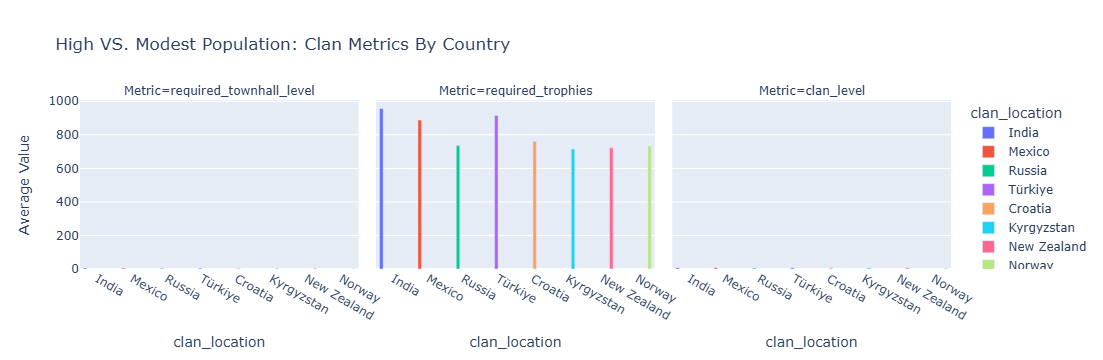

In [76]:
fig_sbs = px.bar(
    combined_group.melt(id_vars = ["clan_location"], var_name = "Metric", value_name = "Average Value"),
    x = "clan_location",
    y = "Average Value",
    color = "clan_location",
    facet_col = "Metric",
    barmode = "group",
    title = "High VS. Modest Population: Clan Metrics By Country"
) 

fig_sbs.show()

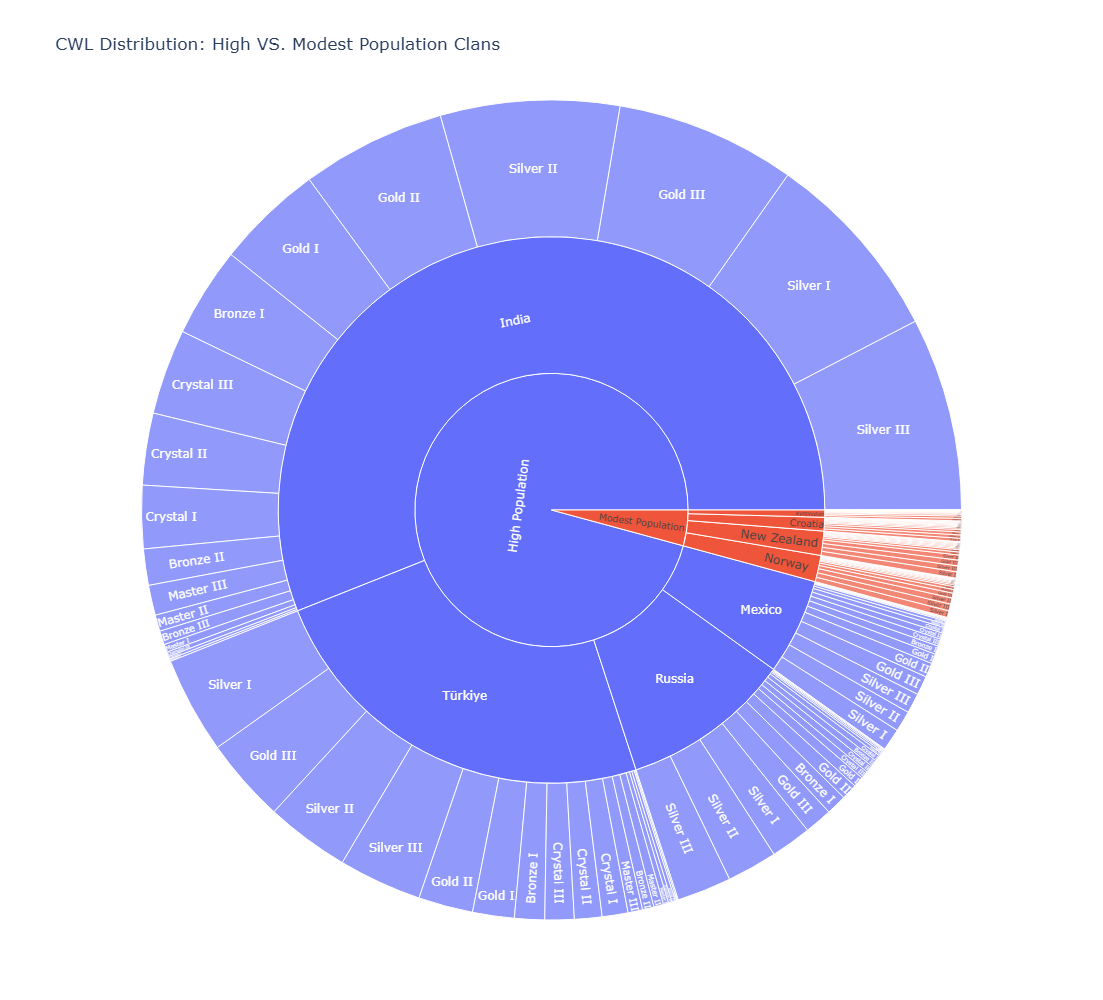

In [77]:
#CWL distribution
cwl_fig = px.sunburst(cwl_combined, 
                      path = ["pop_group", "clan_location", "clan_war_league"], 
                      values = "count", 
                      title = "CWL Distribution: High VS. Modest Population Clans",
                      width=1000, height=1000)

cwl_fig.show()

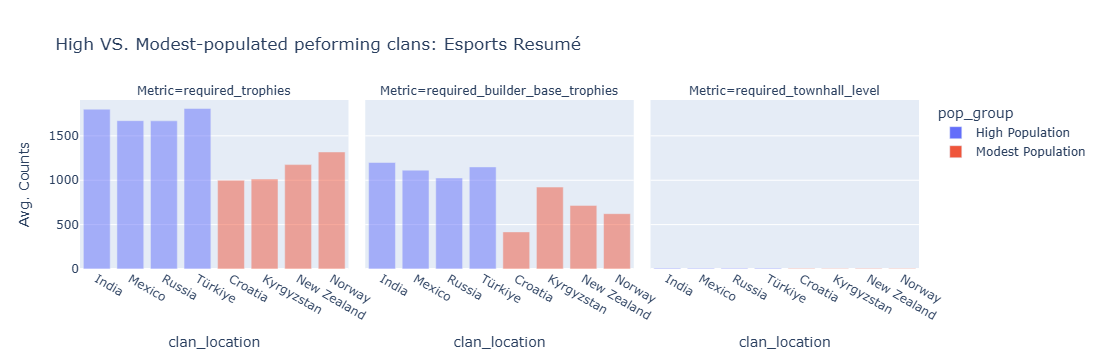

In [78]:
#Grouped Bar Chart
metric_bar = px.bar(melted_pop_req, 
                    x = "clan_location", 
                    y = "Avg. Counts", 
                    color = "pop_group", 
                    facet_col = "Metric", 
                    barmode = "overlay",
                   title = "High VS. Modest-populated peforming clans: Esports Resumé")
metric_bar.show()

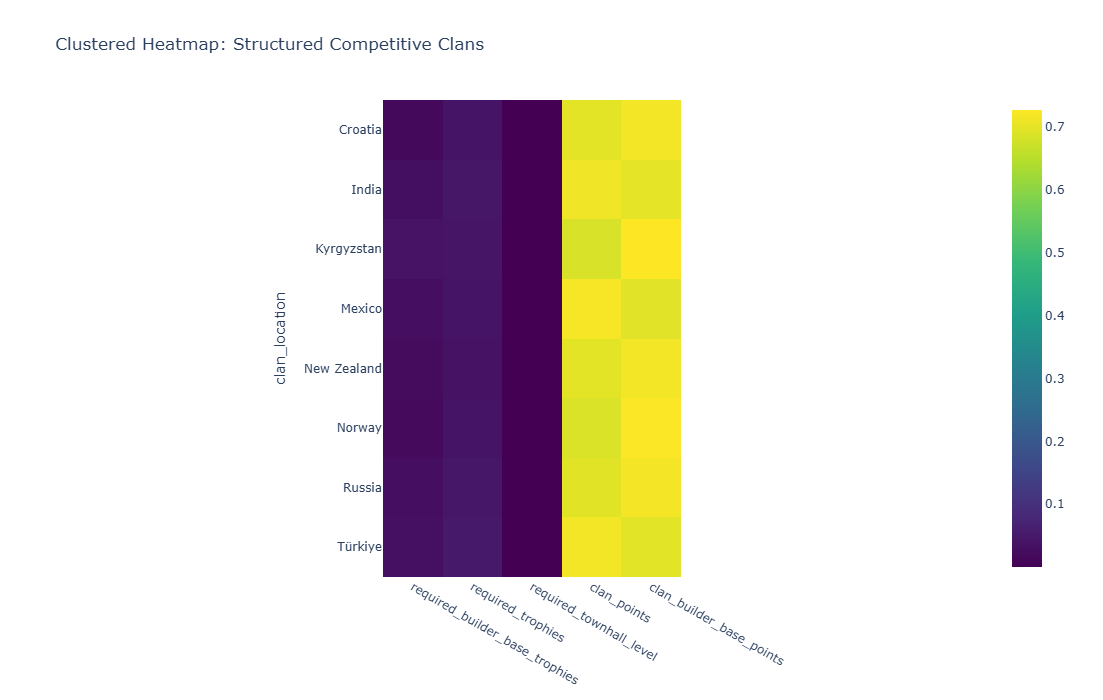

In [79]:
#Clustered Heatmap
fig_heatmap = px.imshow(
    heatmap_encoded_df,
    x=clus_features ,
    y=heatmap_encoded_df .index,
    color_continuous_scale="Viridis",
    title="Clustered Heatmap: Structured Competitive Clans",
    width=800, height=700
)

fig_heatmap.show()

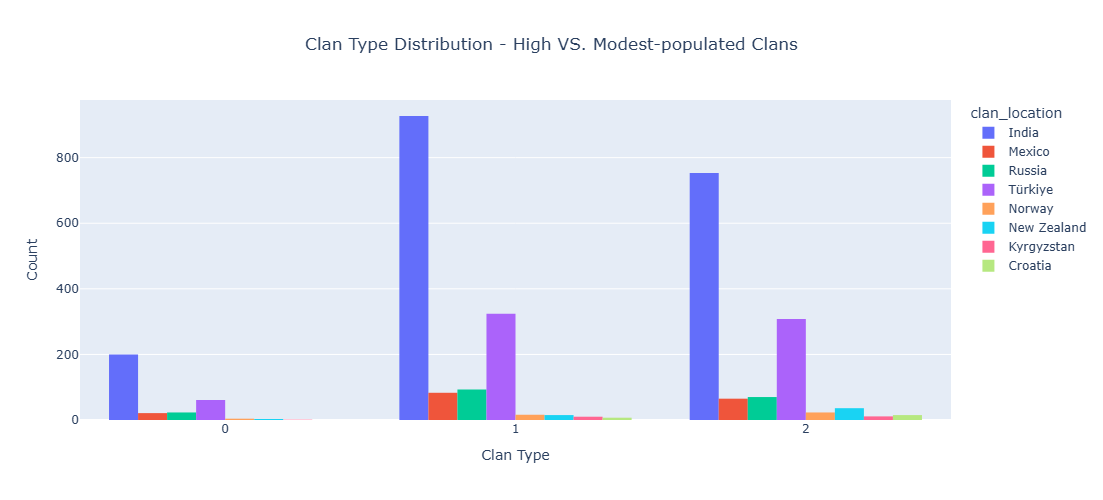

In [80]:
#Bar plot (Clan Type Distribution)
bar_fig = px.histogram(combined_ct, x="clan_type", color="clan_location", barmode="group", title = "Clan Type Distribution - High VS. Modest-populated Clans")

bar_fig.update_layout(showlegend=True, title_x=0.5, width=800, height=500, xaxis_title = "Clan Type", yaxis_title = "Count")
bar_fig.show()

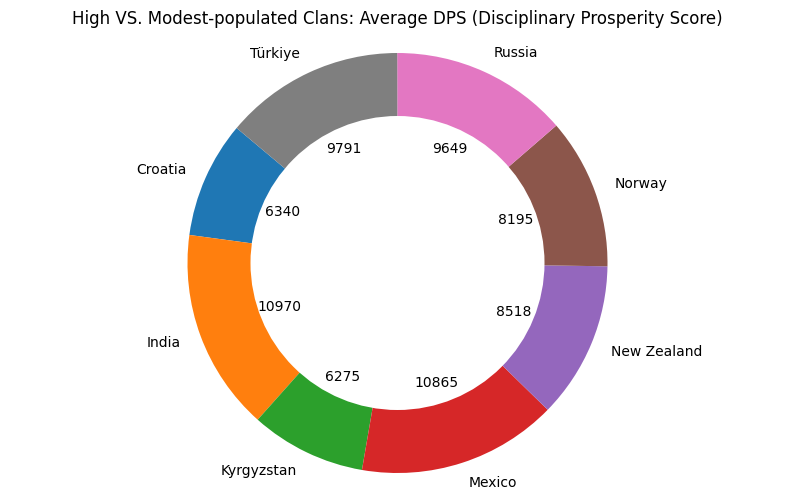

In [81]:
#DPS Visualisation (Donut Chart)
label = dps_df["clan_location"]
sizes = dps_df["dps"]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the donut chart
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=label,
    autopct=lambda pct: format_dps(pct, sizes),  # Show actual DPS values
    startangle=140,
    wedgeprops=dict(width=0.4)
)

# Center circle to create donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Set equal aspect ratio
ax.axis('equal')

# Title
plt.title("High VS. Modest-populated Clans: Average DPS (Disciplinary Prosperity Score)", fontsize=12)
plot_all[f"t3_s2_dps"] = fig
plt.show()

#### Task 4: ASEAN Standing - Old But Evergreen ####

#### Section 1: Unrevealed Potential ####

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


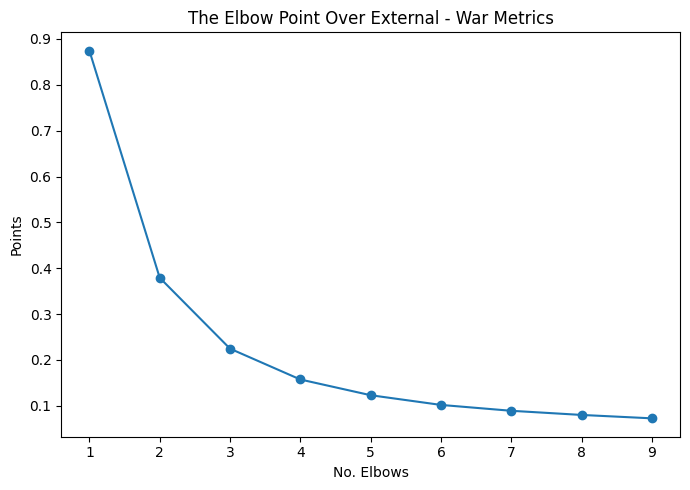

In [82]:
#Determine the optimal k
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42, n_init = 10)
    kmeans.fit(x_normalized)
    inertia.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize = (7, 5))

ax.plot(k_values, inertia, marker = "o")
ax.set_title("The Elbow Point Over External - War Metrics")
ax.set_xlabel("No. Elbows")
ax.set_ylabel("Points")
plt.tight_layout()
plot_all[f"t4_s1_unp"] = fig
plt.show()

In [83]:
#Fit k-means with respective players
optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k, random_state = 42, n_init = 10)
clusters = kmeans.fit_predict(x_normalized)

x_normalized["player_type"] = clusters

player_type = {0: "Engineers", 1: "Competitors", 2: "Amateurs"}

x_normalized["player_type"] = x_normalized["player_type"].map(player_type)

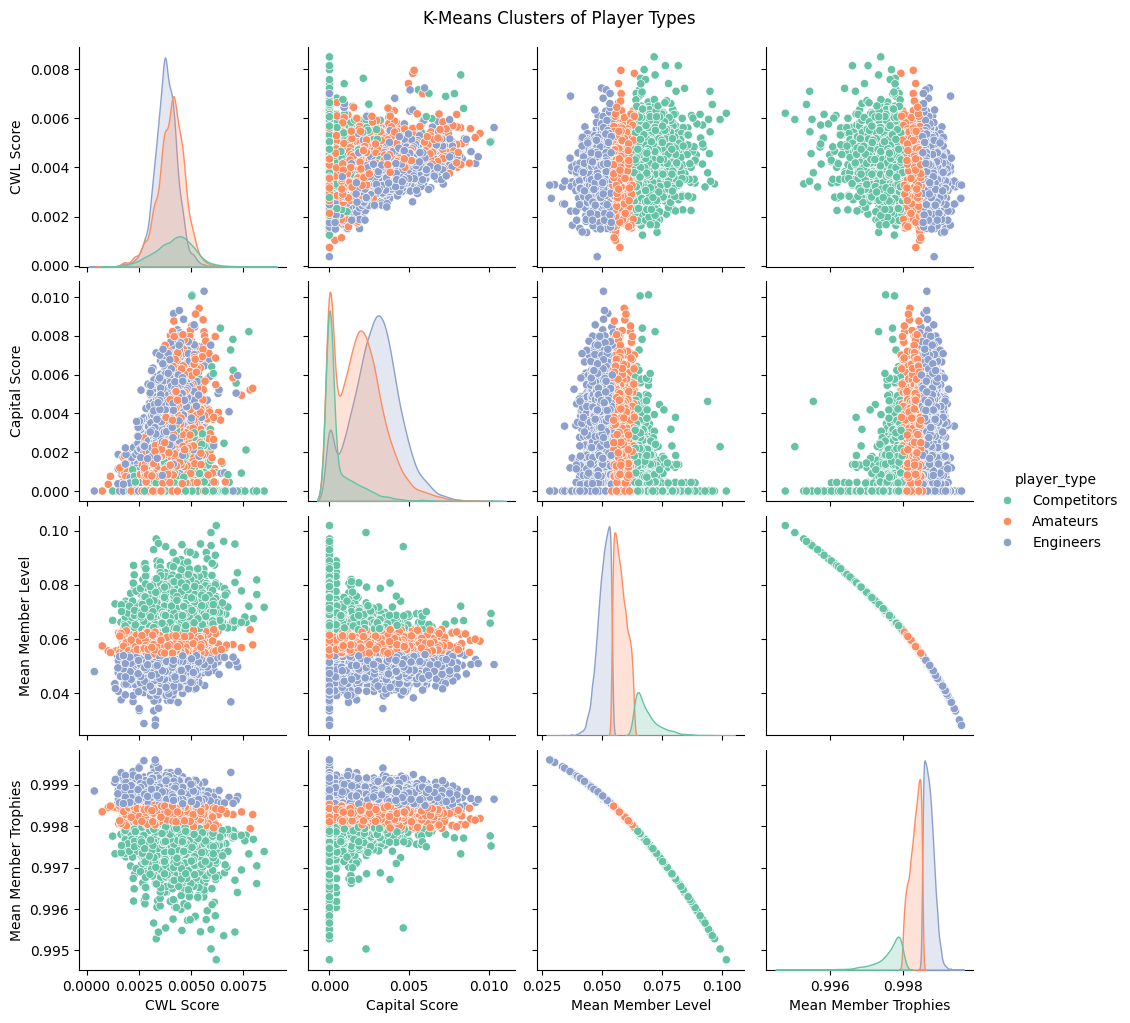

In [84]:
#Visualise the clusters
kmean_features = {
    "cwl_score" : "CWL Score",
    "capital_score" : "Capital Score",
    "mean_member_level" : "Mean Member Level",
    "mean_member_trophies" : "Mean Member Trophies"
}

asean_renamed_features = list(kmean_features.values())

x_normalized = x_normalized.rename(columns = kmean_features)

g = sns.pairplot(x_normalized, vars=asean_renamed_features, hue="player_type", palette="Set2")
g.fig.suptitle("K-Means Clusters of Player Types", y=1.02)

plot_all[f"t4_s1_kmeans"] = g.fig
plt.show()

In [85]:
#One-way ANOVA
anova = {}

for col in asean_renamed_features:
    groups = [x_normalized.loc[x_normalized["player_type"] == c, col].values for c in x_normalized["player_type"].unique()]
    f_stats, p_vals = f_oneway(*groups)
    anova[col] = {"F-statistics" : f_stats, "P-value" : p_vals}

anova_df = pd.DataFrame(anova).T

print("ANOVA Results Comparing To Respective Player Types")
print(anova_df)

ANOVA Results Comparing To Respective Player Types
                      F-statistics        P-value
CWL Score               439.474702  4.488930e-187
Capital Score          2315.967442   0.000000e+00
Mean Member Level     32404.055319   0.000000e+00
Mean Member Trophies  29408.287886   0.000000e+00


#### Section 2: Persistance (Fighting Spirit) ####

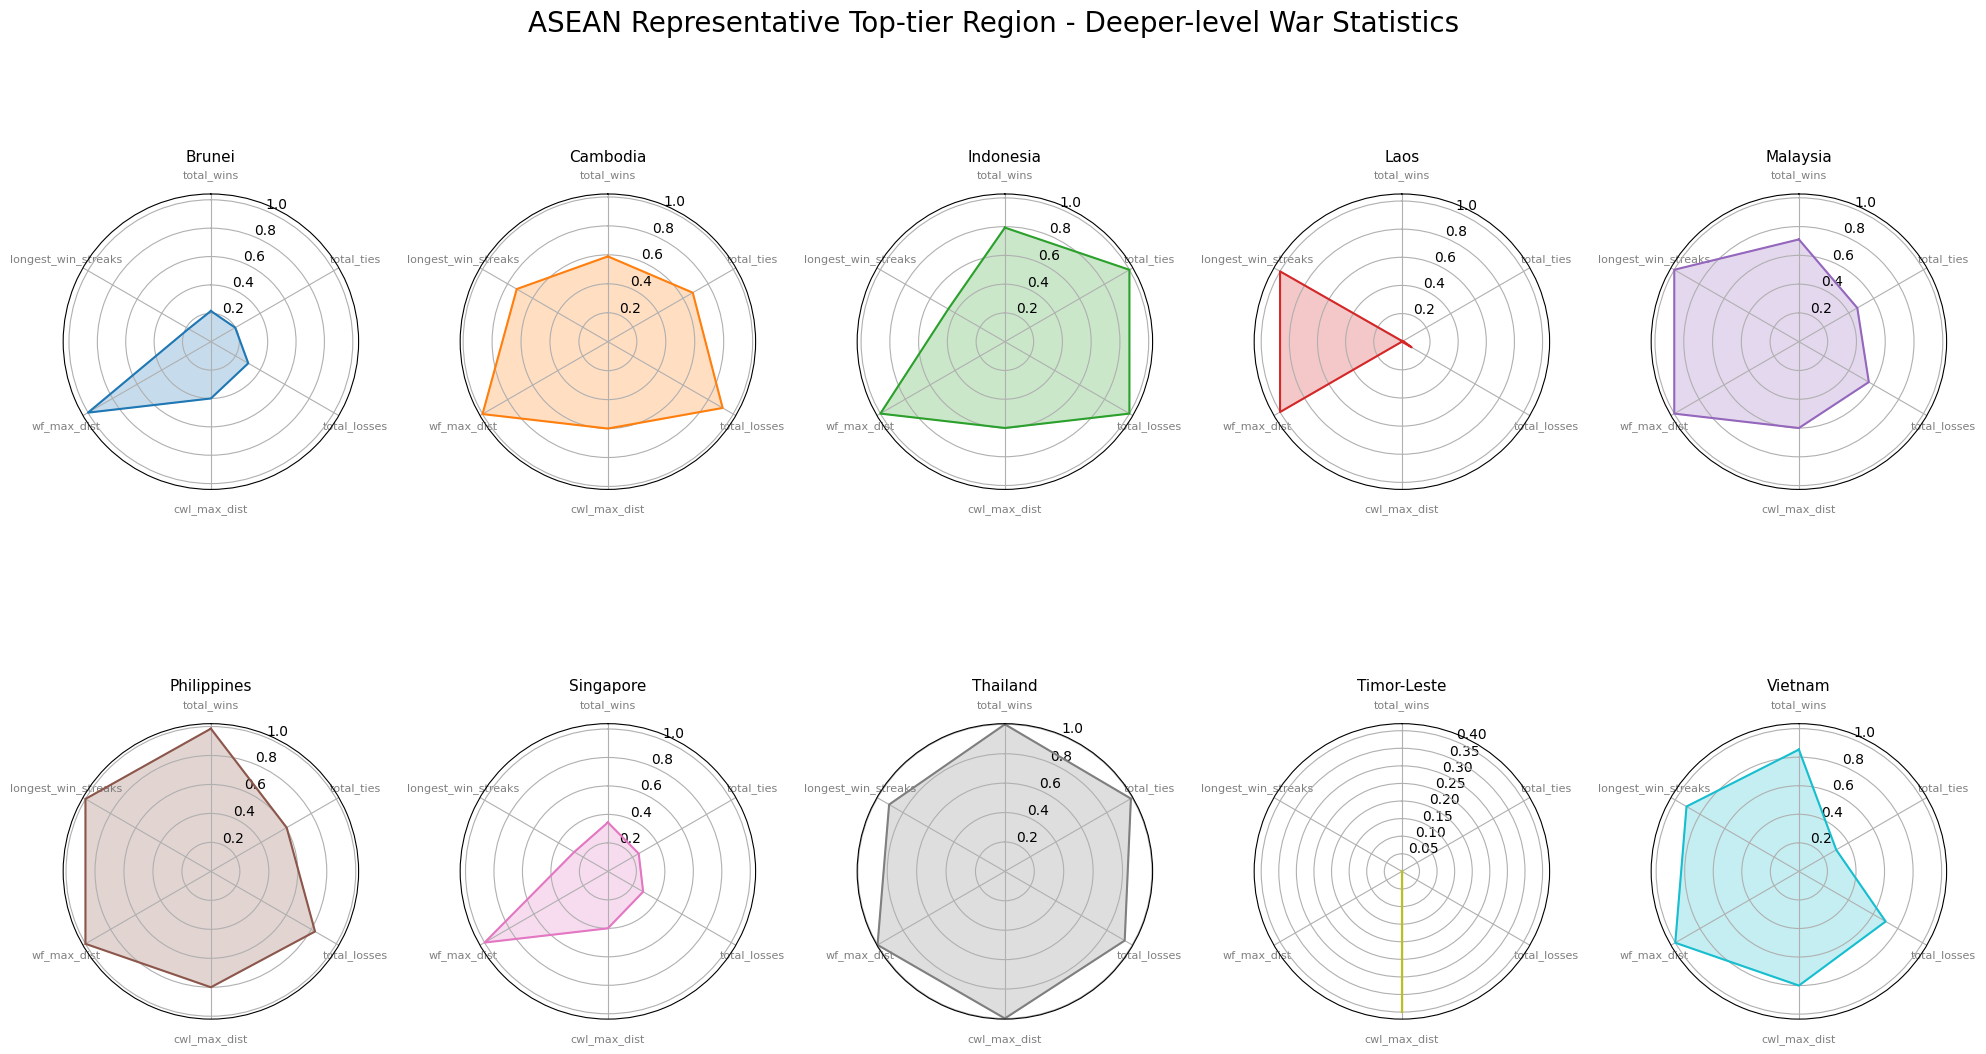

In [86]:
rows = 2
cols = 5

asean_repr_radar = ["total_wins", "total_ties", "total_losses", "cwl_max_dist", "wf_max_dist", "longest_win_streaks"]
num_countries = len(repr_asean_normalized[:rows * cols])

#Radar Chart
color = sns.color_palette("tab10", num_countries)

def make_radar_chart(ax, df, country_name, color):
    categories = asean_repr_radar
    
    values = df[df["clan_location"] == country_name][categories].values.flatten().tolist()
    values += values[:1] #Repeat the first value to close the circle

    #Calculate angle to fill in the color
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, color="grey", size=8)

    ax.plot(angles, values, linewidth=1.5, linestyle="solid", label=country_name, color = color)
    ax.fill(angles, values, alpha=0.25, color = color)
    ax.set_title(f"{country_name}", size=11)

#Subplots
fig, axs = plt.subplots(rows, cols, subplot_kw = dict(polar = True), figsize = (20, 12))

#Flatten for easy iteration
axs = axs.flatten()

for i, country in enumerate(repr_asean_normalized.index[:rows * cols]):
    make_radar_chart(axs[i], repr_asean_normalized.reset_index(), country, color[i])

plt.suptitle("ASEAN Representative Top-tier Region - Deeper-level War Statistics", size = 20)
plt.tight_layout()
plot_all[f"t4_s2_asean"] = fig
plt.show()

### Task 5 ###

#### Section 1: Tie matches in Normal Clan War & Clan War League ####

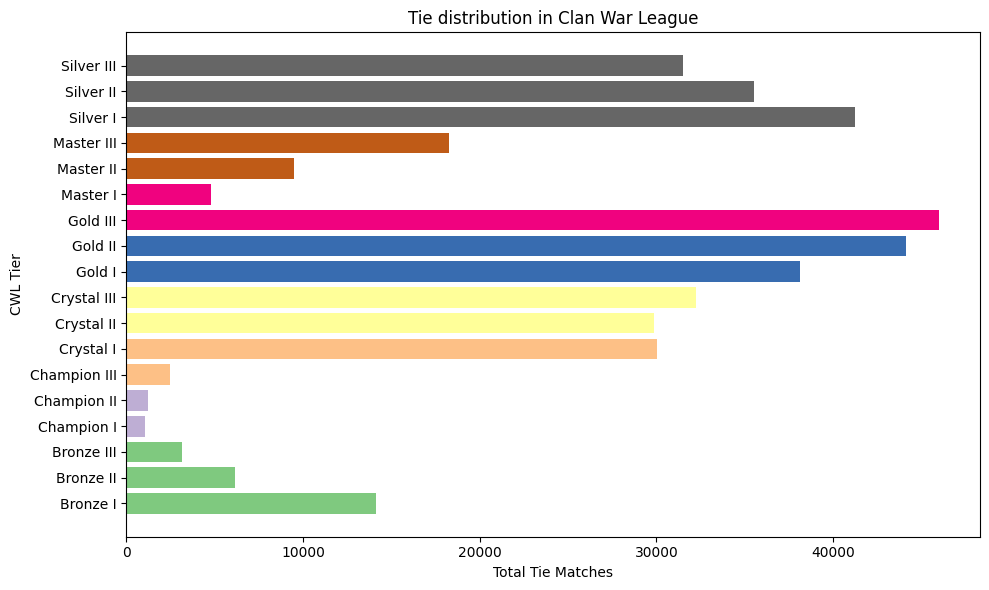

In [87]:
n_bars = len(ties_grouped) #Length of variables
cmap = cm.get_cmap("Accent", n_bars) #Obtain colors

colors = [cmap(i) for i in range(n_bars)]

#Horizontal Bar Plot
fig, ax = plt.subplots(figsize = (10, 6))
ax.barh(y = ties_grouped.index, width = ties_grouped["war_ties"], color = colors)

ax.set_xlabel("Total Tie Matches")
ax.set_ylabel("CWL Tier")
ax.set_title("Tie distribution in Clan War League")
plt.tight_layout()
plot_all[f"t5_s1_tie"] = fig
plt.show()

#### Section 2: Netherite Gear VS. Diamond Gear With Mending ####

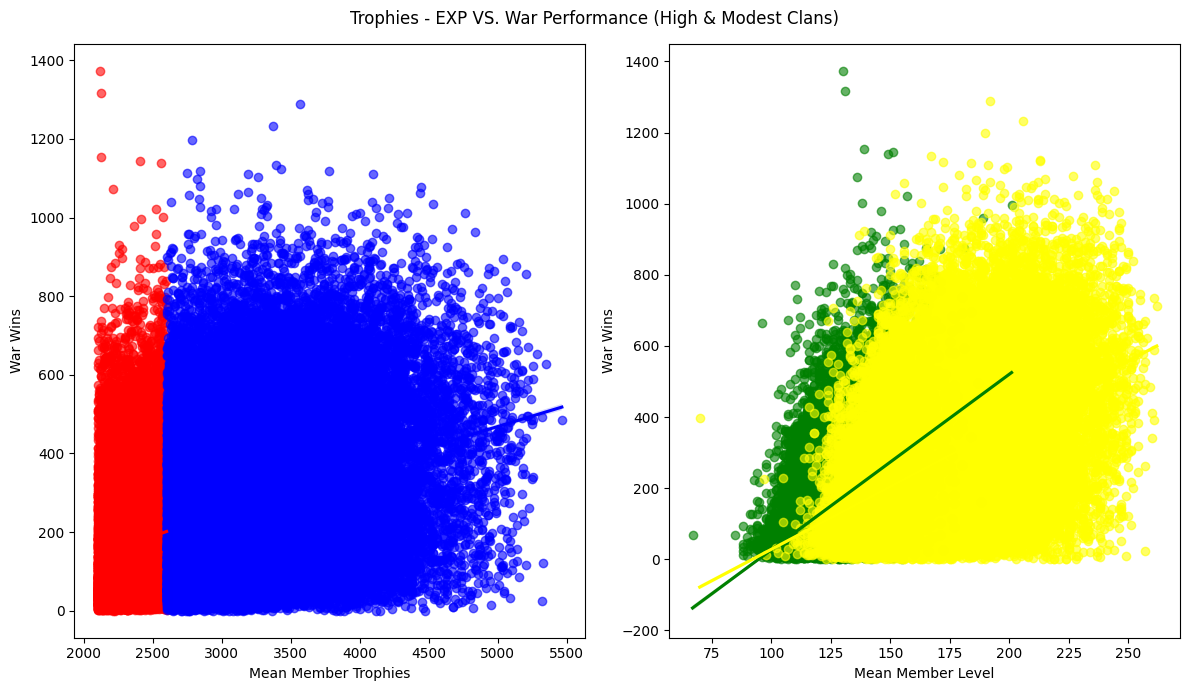

In [88]:
fig, axs = plt.subplots(1, 2, figsize = (12, 7))

x_label_map = {
    "mean_member_trophies" : "Mean Member Trophies",
    "mean_member_level" : "Mean Member Level"
}

sns.regplot(x = "mean_member_trophies", 
            y = "war_wins", 
            data = diamond_mending, 
            scatter_kws={'alpha':0.6}, 
            label="High-performing", color="red",
           ax = axs[0])
axs[0].set_xlabel(x_label_map["mean_member_trophies"])
axs[0].set_ylabel("War Wins")

sns.regplot(x = "mean_member_level", 
            y = "war_wins", 
            data = diamond_mending, 
            scatter_kws={'alpha':0.6}, 
            label="High-performing", color="green",
           ax = axs[1])
axs[1].set_xlabel(x_label_map["mean_member_level"])
axs[1].set_ylabel("War Wins")

sns.regplot(x = "mean_member_trophies", 
            y = "war_wins", 
            data = netherite, 
            scatter_kws={'alpha':0.6}, 
            label="High-performing", color="blue",
           ax = axs[0])
axs[0].set_xlabel(x_label_map["mean_member_trophies"])
axs[0].set_ylabel("War Wins")

sns.regplot(x = "mean_member_level", 
            y = "war_wins", 
            data = netherite, 
            scatter_kws={'alpha':0.6}, 
            label="High-performing", color="yellow",
           ax = axs[1])
axs[1].set_xlabel(x_label_map["mean_member_level"])
axs[1].set_ylabel("War Wins")

plt.suptitle("Trophies - EXP VS. War Performance (High & Modest Clans)")
plt.tight_layout()
plot_all[f"t5_s2_tropexp"] = fig
plt.show()

#### Section 3: Investigation of Abandoned Clans ####

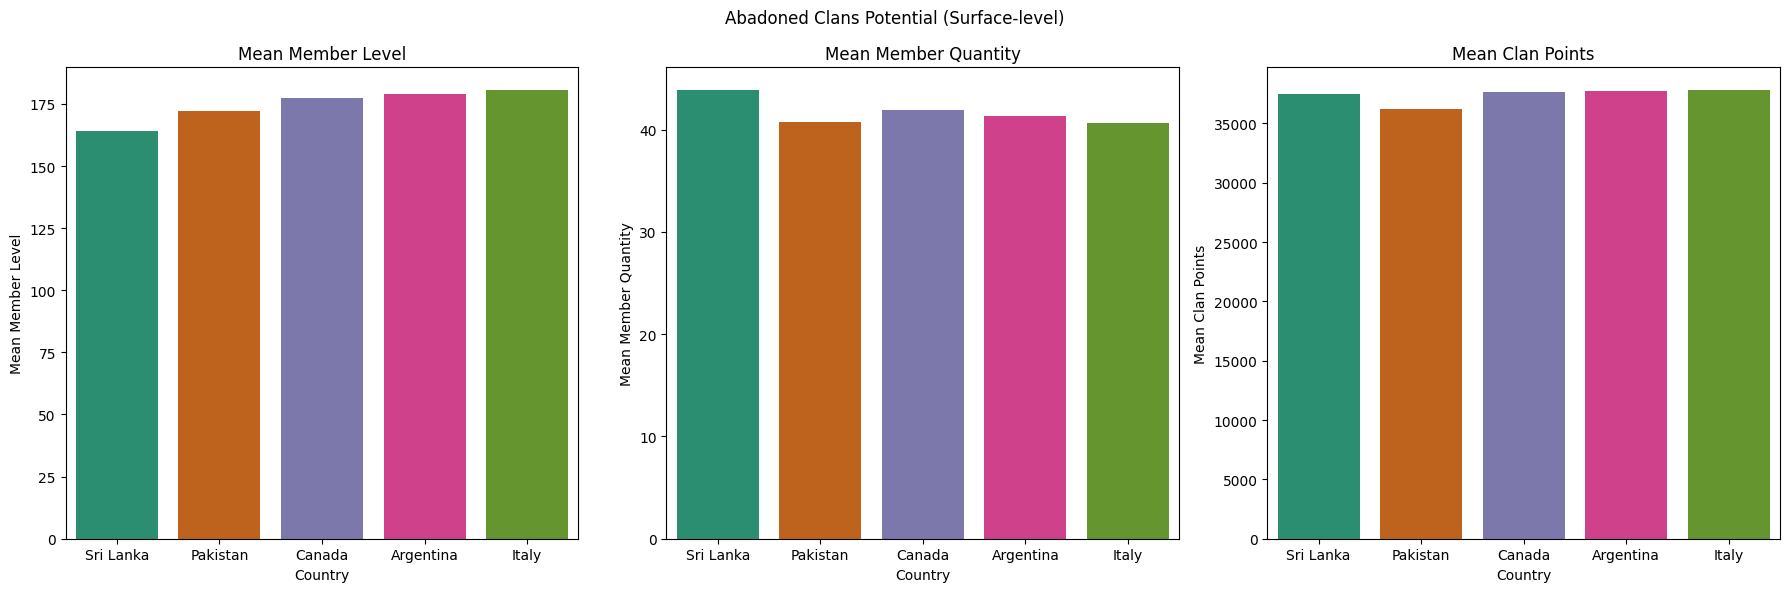

In [89]:
ab_metrics = ["mean_member_level", "mean_member_quantity", "mean_clan_points"]

ab_rename = {
    "mean_member_level" : "Mean Member Level",
    "mean_member_quantity" : "Mean Member Quantity",
    "mean_clan_points" : "Mean Clan Points"
}

#Define a consistent color palette for each countries
country_palette = sns.color_palette("Dark2", n_colors = ab_df["country"].nunique())
country_color_map = dict(zip(ab_df["country"].unique(), country_palette))

fig, axs = plt.subplots(1, len(ab_metrics), figsize = (18, 6), sharey = False)

for i, metric in enumerate(ab_metrics):
    sns.barplot(x = "country", y = metric, data = ab_df, ax = axs[i], palette = country_color_map)
    axs[i].set_title(metric.replace("_", " ").title())
    axs[i].set_xlabel("Country")
    axs[i].set_ylabel(ab_rename.get(metric, metric))

plt.suptitle("Abadoned Clans Potential (Surface-level)")
plt.tight_layout()
plot_all[f"t5_s3_abandoned"] = fig
plt.show()

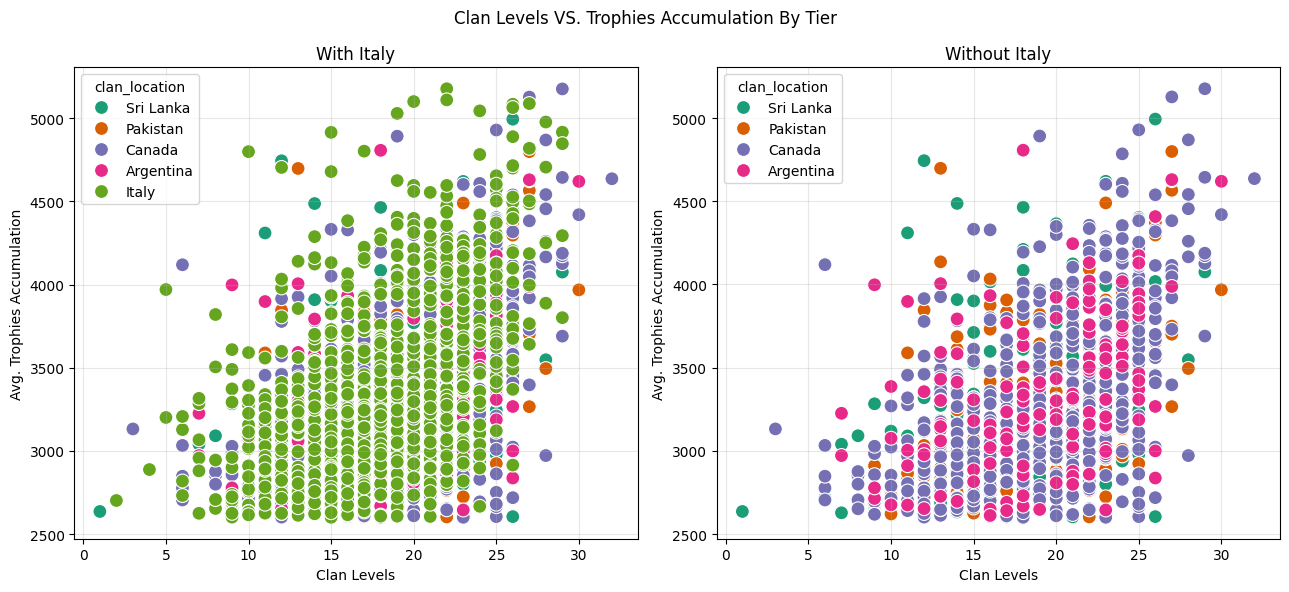

In [90]:
#Main investigation

fig, ax = plt.subplots(1, 2, figsize = (13, 6))
sns.scatterplot(x = "clan_level", y = "mean_member_trophies", hue = "clan_location", data = ab_scatter_df, s = 100, ax = ax[0], palette = country_color_map)

ax[0].grid(alpha = 0.3)
ax[0].set_xlabel("Clan Levels")
ax[0].set_ylabel("Avg. Trophies Accumulation")
ax[0].set_title("With Italy")

sns.scatterplot(x = "clan_level", y = "mean_member_trophies", hue = "clan_location", data = ab_scatter_no_italy_df, s = 100, ax = ax[1], palette = country_color_map)

ax[1].grid(alpha = 0.3)
ax[1].set_xlabel("Clan Levels")
ax[1].set_ylabel("Avg. Trophies Accumulation")
ax[1].set_title("Without Italy")

plt.suptitle("Clan Levels VS. Trophies Accumulation By Tier")
plt.tight_layout()
plot_all[f"t5_s2_acc"] = fig
plt.show()

#### Section 4: Cultural Clan Behaviour ####

In [96]:
!pip install wordcloud

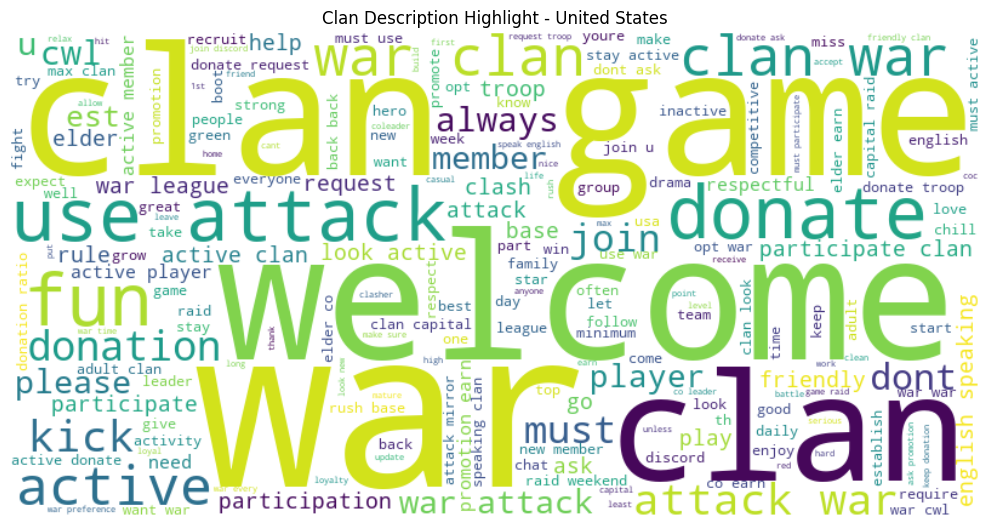

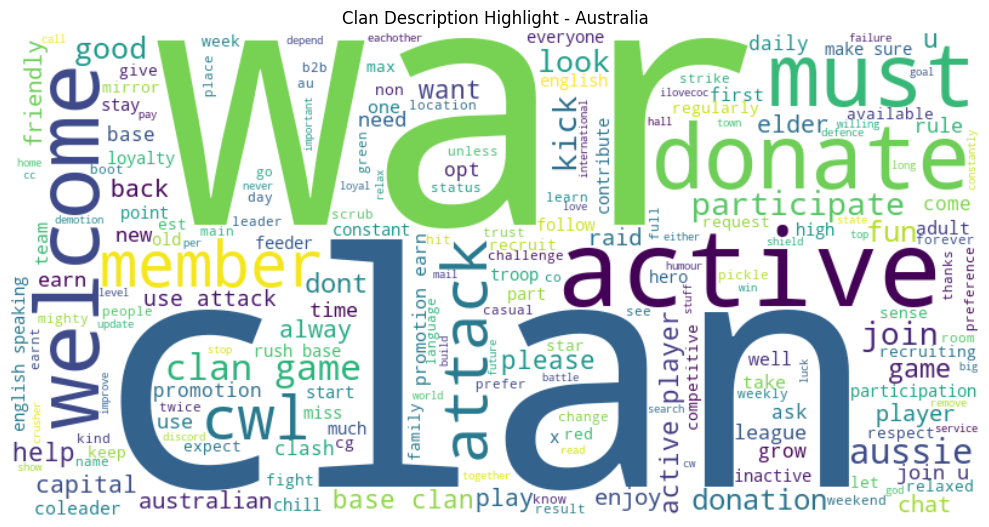

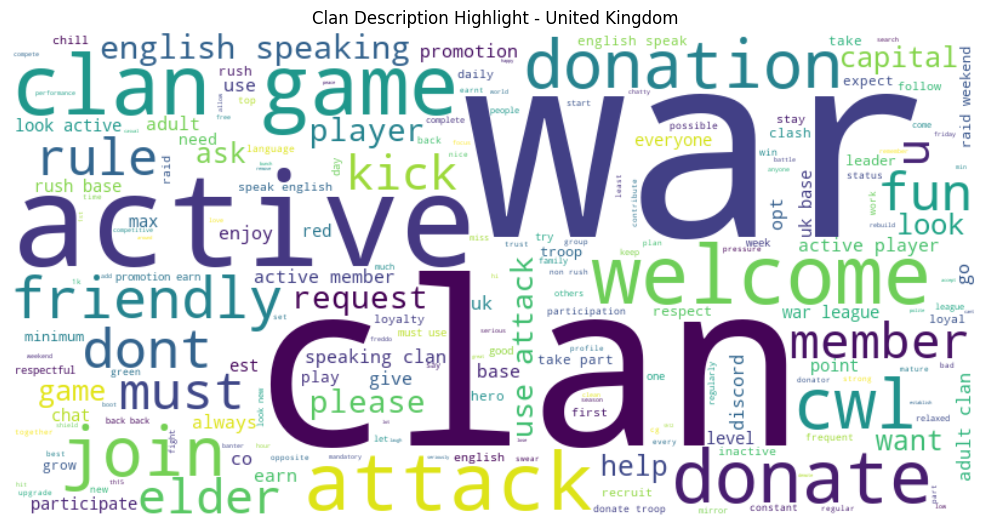

In [91]:
cultural_countries = eng_filtered_df["clan_location"].unique()

for country in cultural_countries:
    text = " ".join([" ".join(tokens) for tokens in eng_filtered_df[eng_filtered_df["clan_location"] == country]["cleaned_clan_description"]])
    wc = WordCloud(width = 800, height = 400, background_color = "white").generate(text)

    fig, ax = plt.subplots(figsize = (10, 6))
    ax.imshow(wc, interpolation = "bilinear")
    ax.axis("off")
    ax.set_title(f"Clan Description Highlight - {country}")
    
    plt.tight_layout()
    plot_all[f"t5_s4_{country}"] = fig
    plt.show()

### ⚙️ Feature Preprocessing 🛠️ ###

#### 1. Data Preprocessing ####

In [92]:
#Preliminary Feature Removal
capital_filtered_df = capital_df[capital_df["capital_league"] != "Unranked"]
capital_filtered_df = capital_filtered_df.drop(columns = ["clan_tag", "clan_name"]).reset_index()
war_filtered_df = war_df[war_df["clan_war_league"] != "Unranked"]
war_filtered_df = war_filtered_df.drop(columns = ["clan_tag", "clan_name"]).reset_index()

external_filtered_df = external_df.drop(columns = ["clan_tag", "clan_name"]).reset_index()
power_filtered_df = power_df.drop(columns = ["clan_tag", "clan_name"]).reset_index()

In [93]:
#Clan Location Mapping
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
holder = external_filtered_df.copy()

holder["clan_location_encoded"] = le.fit_transform(holder["clan_location"])

location_map = dict(zip(holder["clan_location_encoded"], holder["clan_location"]))

In [32]:
#Alternative to mapping
#holder = external_filtered_df.copy()

#inverse_pipeline = EDAPipeline([
#    ColumnTransformerStep(LabelEncoding(), ["clan_location"])
#])

#transformed = inverse_pipeline.fit_transform(holder[["clan_location"]])

#map_holder = inverse_pipeline.inverse_transform(transformed)

In [94]:
war_pipeline = EDAPipeline([
    ColumnTransformerStep(LabelEncoding(), ["war_frequency", "clan_location"]),
])

external_pipeline = EDAPipeline([
    ColumnTransformerStep(YeoJohnsonTransformer(), ["mean_member_trophies", "clan_points", "clan_builder_base_points"]),
    ColumnTransformerStep(LabelEncoding(), ["clan_location"])
])
power_pipeline = EDAPipeline([
    ColumnTransformerStep(OneHotEncoding(), ["isFamilyFriendly"]),
    ColumnTransformerStep(LabelEncoding(), ["clan_type"]),
    ColumnTransformerStep(YeoJohnsonTransformer(), ["required_trophies", "required_builder_base_trophies"]),
    ColumnTransformerStep(LabelEncoding(), ["clan_location"])
])
capital_pipeline = EDAPipeline([
    ColumnTransformerStep(BoxCoxTransformer(), ["clan_capital_points"]),
    ColumnTransformerStep(LabelEncoding(), ["clan_location"])
])

#Apply transformation to each df
war_transformed_df = war_pipeline.fit_transform(war_filtered_df)
external_transformed_df = external_pipeline.fit_transform(external_filtered_df)
power_transformed_df = power_pipeline.fit_transform(power_filtered_df)
capital_transformed_df = capital_pipeline.fit_transform(capital_filtered_df)

war_transformed_df = war_transformed_df.reset_index(drop = True)
external_transformed_df = external_transformed_df.reset_index(drop = True)
power_transformed_df = power_transformed_df.reset_index(drop = True)
capital_transformed_df = capital_transformed_df.reset_index(drop = True)

In [95]:
war_transformed_df["clan_war_league"] = war_transformed_df["clan_war_league"].map(league_map)
war_transformed_df["clan_location"] = war_transformed_df["clan_location"].map(location_map)
capital_transformed_df["capital_league"] = capital_transformed_df["capital_league"].map(capital_map)
capital_transformed_df["clan_location"] = capital_transformed_df["clan_location"].map(location_map)

war_transformed_df = war_transformed_df.drop(columns=['index'])
capital_transformed_df = capital_transformed_df.drop(columns=['index'])

#### 2. Feature Aggregation ####

In [97]:
def agg_dataframe(subframes, key, how = "left"):
    #reduce(): apply functions cummulatively to the list, tuple, etc.
    #lamda(): annonymous function that merge left and right: e.g: merge war_df with external_df, then merge with capital_df
    #on: On primary key
    #how: LEFT - OUTER - INNER JOINS (by default: LEFT)
    return reduce(lambda left, right : pd.merge(left, right, on=key, how = how), subframes)

In [98]:
clan_properties_df = agg_dataframe([external_transformed_df, power_transformed_df], "index")
clan_properties_df = clan_properties_df.drop(columns = "clan_location_y").rename(columns = {"clan_location_x" : "clan_location"})

In [99]:
clan_properties_df["clan_location"] = clan_properties_df["clan_location"].map(location_map)

### 📥 Savestates 🔖 ###

For further accessibility, seperated versions of this preprocessed dataset has been provided which offer various uses in Machine Learning field. Scientists and business - marketing analysts could be using plotting graphs as references alongsides gigantic plot retrieval provided beforehand.

#### 1. Interdisciplanary ML Dataset Versions ####

In [101]:
def save_dataset(df, filename, folder = "datasets", formats = []):
    os.makedirs(folder, exist_ok = True)
    for fmt in formats:
        path = os.path.join(folder, f"{filename}.{fmt}")
        if fmt == "csv":
            df.to_csv(path, index = False)
        elif fmt == "parquet":
            df.to_parquet(path, index = False)
        elif fmt == "xlsx":
            df.to_excel(path, index = False)
        print(f"Saving Completed: {filename} -> {fmt}")

#### 2. All-in-one Visualisation Capture ####

In [102]:
def save_all_figs(fig_dict, folder = "plots", formats = ["png"]):
    os.makedirs(folder, exist_ok = True)
    for name, fig in fig_dict.items():
        if isinstance(fig, matplotlib.figure.Figure):
            for fmt in formats:
                filepath = os.path.join(folder, f"{name}.{fmt}")
                fig.savefig(filepath, bbox_inches = "tight")
        elif isinstance(fig, go.Figure):
            for fmt in formats:
                filepath = os.path.join(folder, f"{name}.{fmt}")
                pio.write_image(fig, filepath)
        else:
            raise NotImplementedError("Invalid figure type. Expected either Matplotlib or Plotly.")
            continue
        print(f"Saving Completed: {name} -> {formats}")

In [103]:
save_all_figs(plot_all)

Saving Completed: shallow_cwl -> ['png']
Saving Completed: shallow_ff -> ['png']
Saving Completed: shallow_general -> ['png']
Saving Completed: shallow_members -> ['png']
Saving Completed: shallow_clan_level -> ['png']
Saving Completed: t1_s1_corr -> ['png']
Saving Completed: t1_s2_ff -> ['png']
Saving Completed: t1_s2_win_rate -> ['png']
Saving Completed: t1_s2_wf_count -> ['png']
Saving Completed: t1_s2_spearman -> ['png']
Saving Completed: t1_s3_members -> ['png']
Saving Completed: t2_s1_bird_owl -> ['png']
Saving Completed: t2_s1_corr -> ['png']
Saving Completed: t2_s2_cwl_score -> ['png']
Saving Completed: t2_s2_cwl_cl_scores -> ['png']
Saving Completed: t2_s2_archetype -> ['png']
Saving Completed: t3_s1_game_force -> ['png']
Saving Completed: t3_s2_wgr -> ['png']
Saving Completed: t3_s2_big_4_pop -> ['png']
Saving Completed: t3_s2_dps -> ['png']
Saving Completed: t4_s1_unp -> ['png']
Saving Completed: t4_s1_kmeans -> ['png']
Saving Completed: t4_s2_asean -> ['png']
Saving Complet

In [104]:
save_dataset(clan_properties_df, "clan_properties" ,folder="datasets", formats = ["csv"])
save_dataset(war_transformed_df, "war_transformed" , folder="datasets", formats = ["csv"])
save_dataset(capital_transformed_df, "capital_transformed" , folder="datasets", formats = ["csv"])

Saving Completed: clan_properties -> csv
Saving Completed: war_transformed -> csv
Saving Completed: capital_transformed -> csv


### ❌ Limitations 🧩 ###

1. **Frequently Rejected Hypotheses**
2. **UI / UX & Readability**
3. **Datasets Quality**
4. **Encoding Feature Issues**

### 🎖️ Frutiger Legacy & Adoption 💡 ###

- **Data Science Revelation**: How well could hero equipments affect to war outcomes? (Hero Equipments VS. War Metrics) (Slightly impossible)

- **Data Science Revelation**: Do outstanding clans decide superior war performance (both Daily War League & 7-day War League)? In short, are there any unusual war trends (abruptly superb or substandard) and external achivement preferences over war performance occuring in high-tier clans?

### 🎯 Conclusion & Next Steps ⏩ ###

An indepth overhaul of features is being undergone, which requires strenuous efforts on gathering outsources (hero equipments, real-time metrics). Similar to the procedures from previous analysis, EDA plays important role in grasping solid understand of mechanics and uncover the potential relationships between properties. This cycle is followed by the integration of Machine Learning perspectives, supplemented by scraped datasets so as to enrich Clash Of Clans insights.